# Global Power Plant Database

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [2]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From above we see that there are 907 rows and 27 columns from which we will take primary fuel and capacity_mw as target variable one after the another

By looking at the primary_fuel column, we can see that it contains categorical data and hence will be a Classification Problem.

And, as the capacity_mw column contains continuous data we can confirm that it will be a Regression Problem.


In [4]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(907, 27)

In [7]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

### Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As we can see that there are many columns with null values so we will drop the columns if the null values present around 50%(453) of the total values (907).

In [9]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018",
        "generation_gwh_2019","generation_data_source", "estimated_generation_gwh"], axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                907 non-null    object 
 1   country_long           907 non-null    object 
 2   name                   907 non-null    object 
 3   gppd_idnr              907 non-null    object 
 4   capacity_mw            907 non-null    float64
 5   latitude               861 non-null    float64
 6   longitude              861 non-null    float64
 7   primary_fuel           907 non-null    object 
 8   commissioning_year     527 non-null    float64
 9   source                 907 non-null    object 
 10  url                    907 non-null    object 
 11  geolocation_source     888 non-null    object 
 12  year_of_capacity_data  519 non-null    float64
dtypes: float64(5), object(8)
memory usage: 92.2+ KB


In [11]:
df.shape

(907, 13)

## checking null values

In [12]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

The isnull method along with the sum function gives us the details on the missing values. In the above cell we can see that most of the columns have null values present in them that will need to be deal with.

### % of Null value present in the dataset

In [13]:
n=(df.isnull().sum()/(len(df)))*100
np.round(n,4)

country                   0.0000
country_long              0.0000
name                      0.0000
gppd_idnr                 0.0000
capacity_mw               0.0000
latitude                  5.0717
longitude                 5.0717
primary_fuel              0.0000
commissioning_year       41.8964
source                    0.0000
url                       0.0000
geolocation_source        2.0948
year_of_capacity_data    42.7784
dtype: float64

<AxesSubplot:>

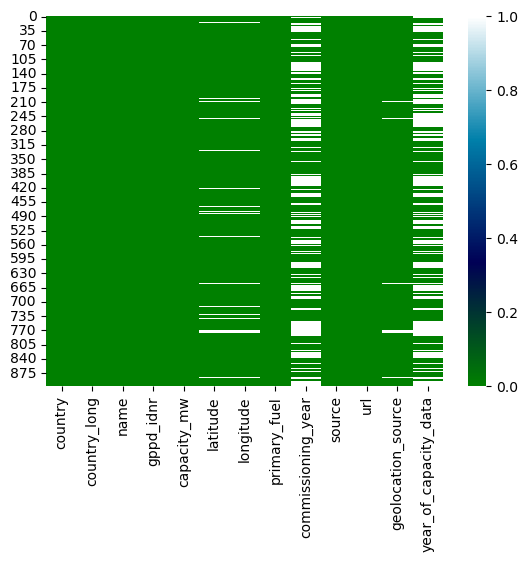

In [14]:
sns.heatmap(df.isnull(),cmap='ocean')

the white line meant there is missing value in the dataset at their position

<AxesSubplot:>

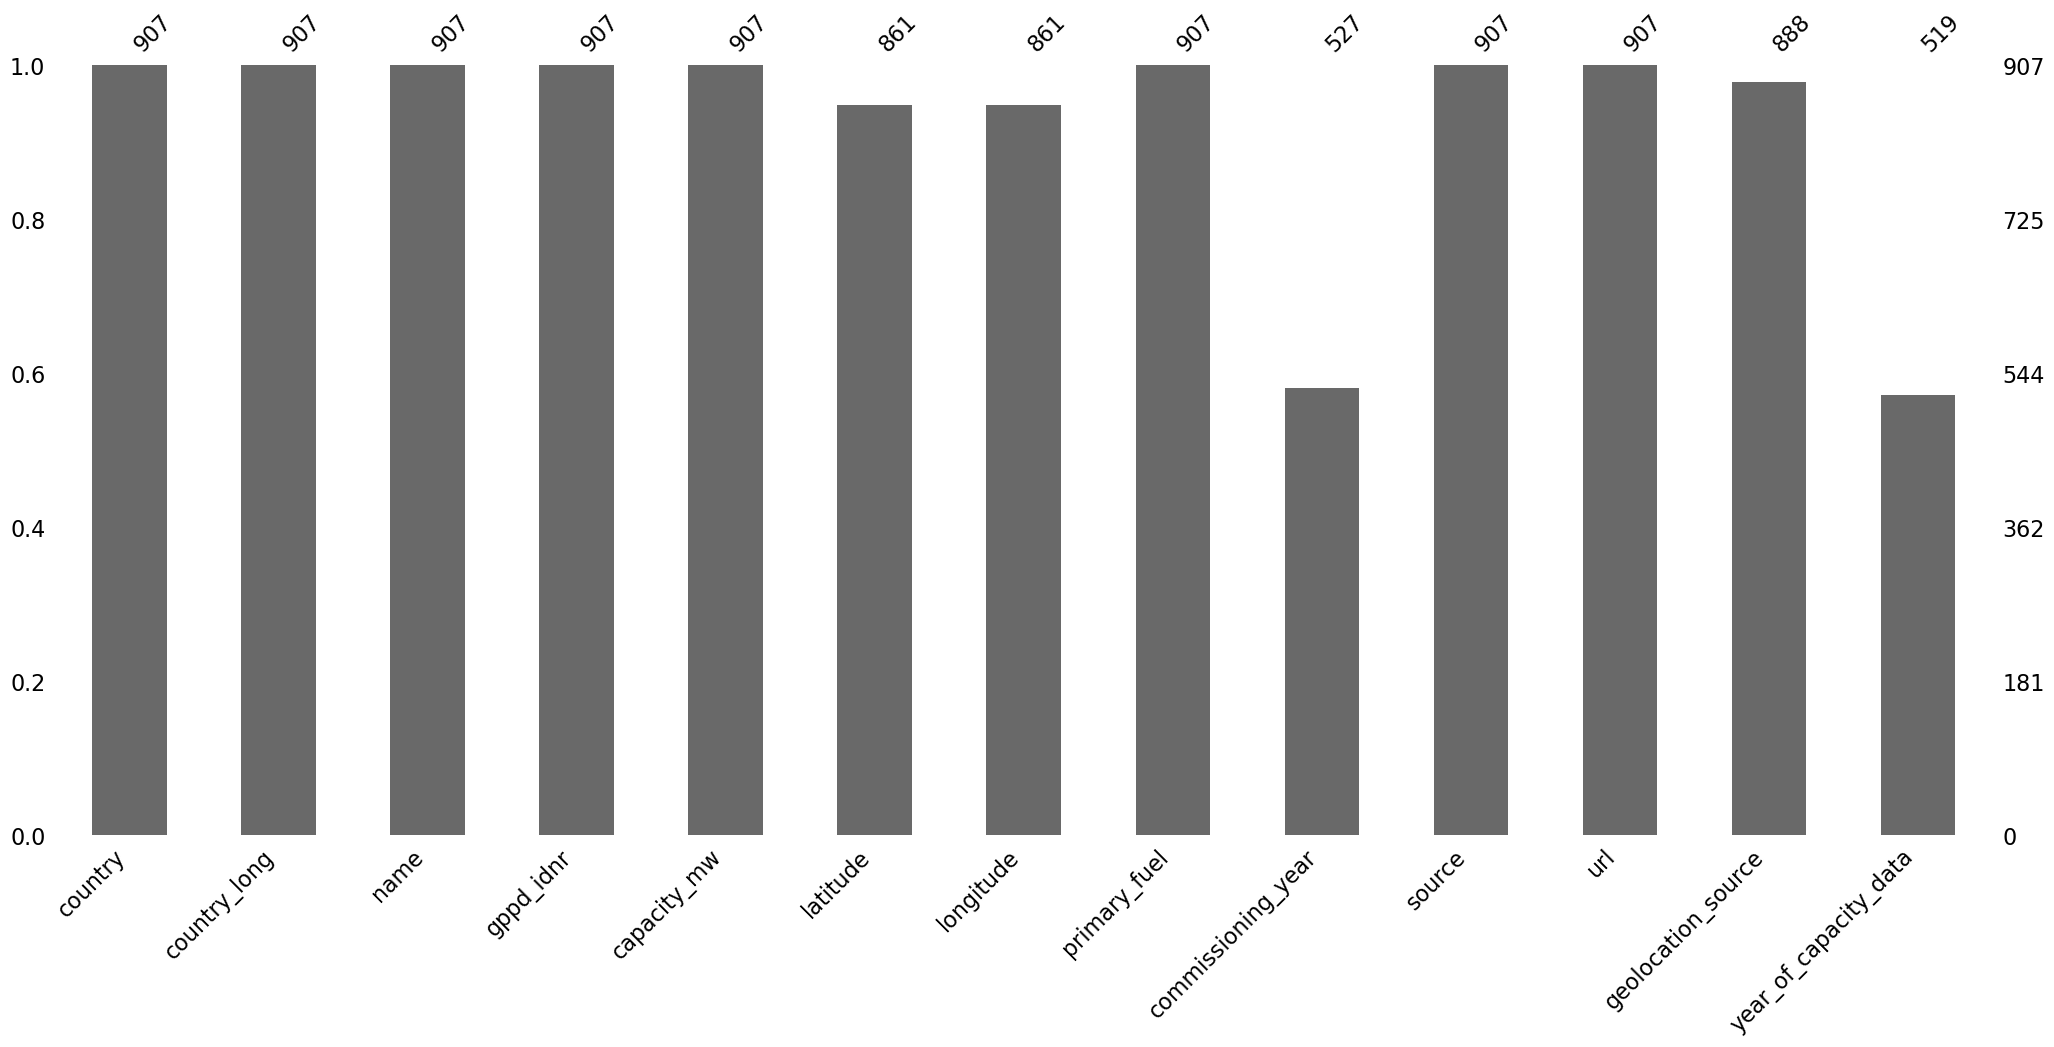

In [15]:
ms.bar(df)

So after getting a visual on the missing values we see that our dataset columns have only few null values present in them..

<AxesSubplot:>

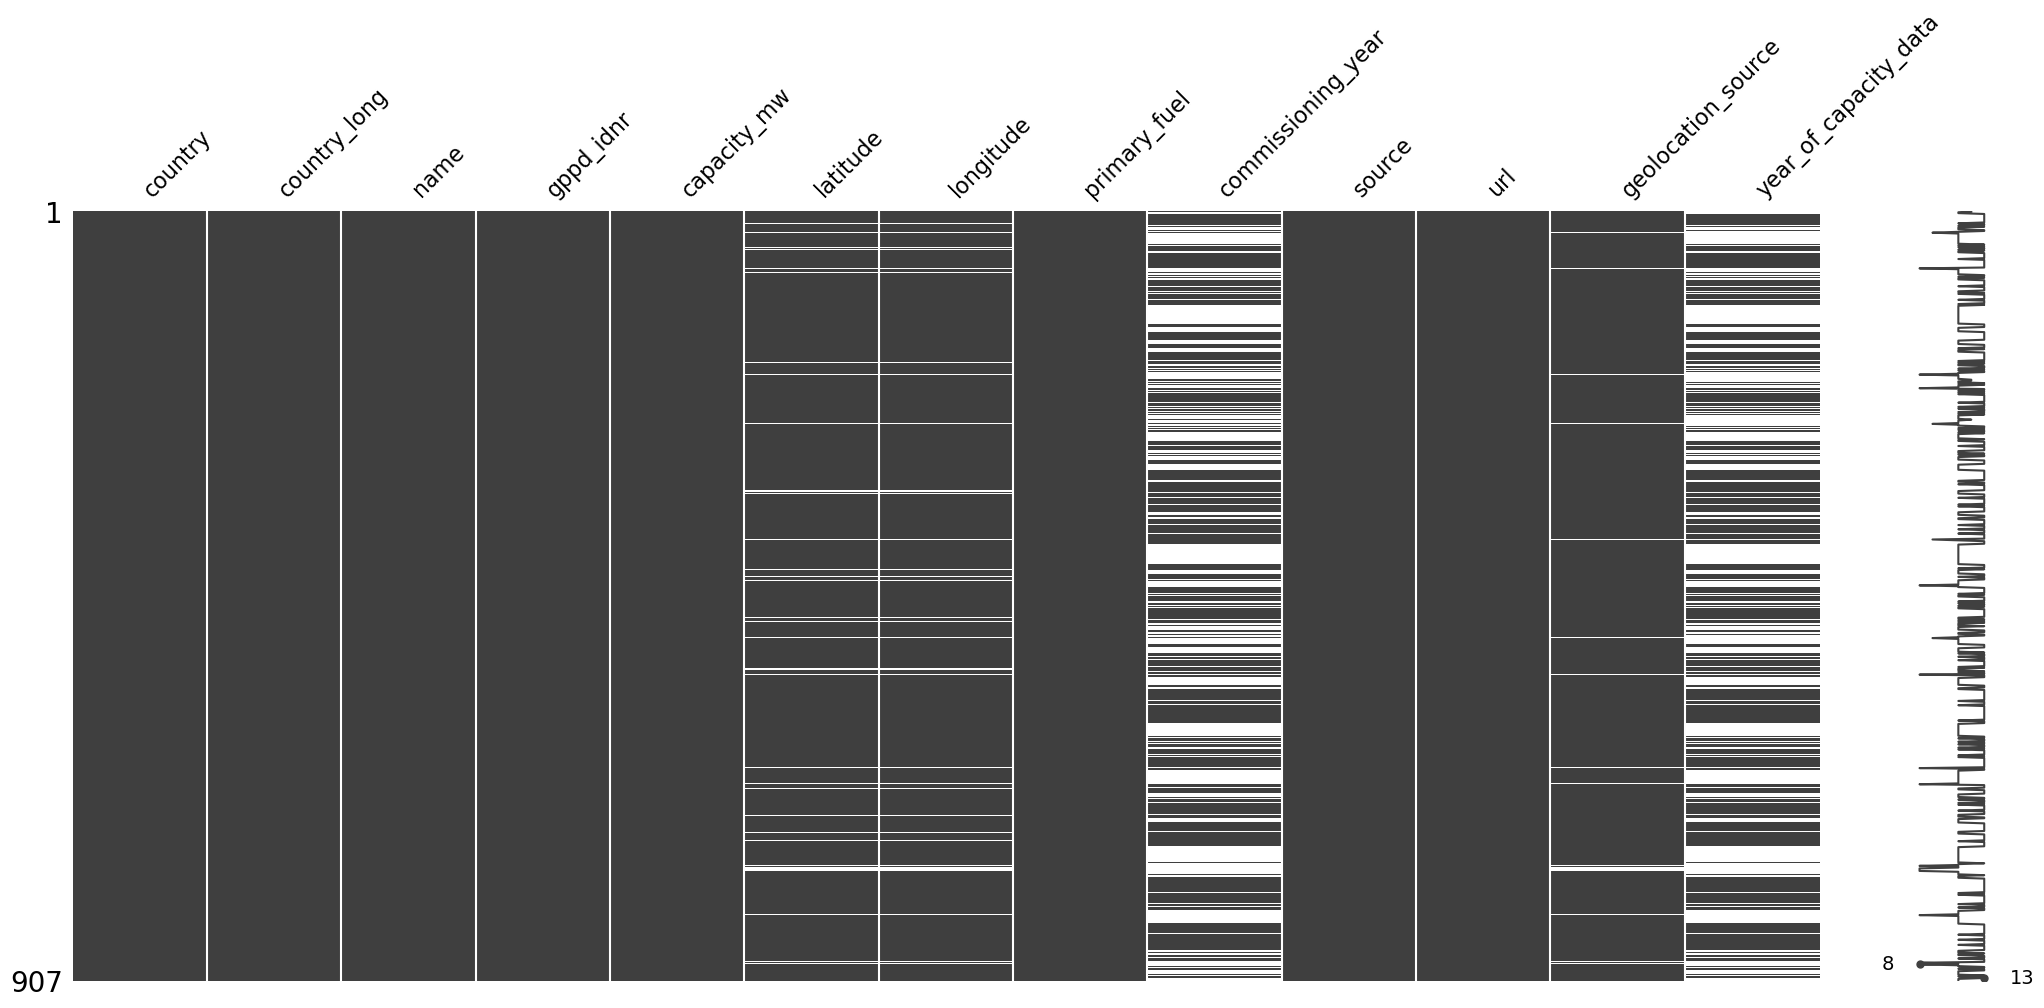

In [16]:
ms.matrix(df)

Matrix chart for missing value position

Okay so it looks like we have less than 1 percent of missing values in each column of our dataset. Since we have more than 907 rows present in our entire dataframe , so have decided to drop those null values and get rid of missing data.

In [17]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

In [18]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

As we can see that Country, Country_long and year_of_capacity_data have only 1 unique value so these columns wont provide much insight and wont be useful for our prediciton, so we will drop them.

We can also see that Name and gppd_idnr columns have each value as a unique value so that wont be useful for our prediction as well so we will drop them too.

Also, we see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.


In [19]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"],axis=1,inplace=True)

In [20]:
df.shape

(907, 7)

We see now that there are only 7 columns present which will be useful for our prediction. Now we will treat the null values with mean for float datatype and mode method for object datatype.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


In [22]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

The null values have been treated.

## find duplicate values

In [24]:
df.duplicated().sum()

2

In [25]:
duplicate = df[df.duplicated()]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
371,77.65,31.268000,76.492000,Hydro,1957.0,Central Electricity Authority,WRI
674,22.50,21.197918,77.464907,Wind,2015.0,CDM,WRI


In [26]:
df.shape

(907, 7)

In [27]:
df=df.drop_duplicates()
df.shape

(905, 7)

after removal of duplicated values data shape has been changed.

In [28]:
df.duplicated().sum()

0

In [29]:
df.nunique()

capacity_mw           361
latitude              837
longitude             828
primary_fuel            8
commissioning_year     73
source                191
geolocation_source      3
dtype: int64

In [30]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [31]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

## seperate the data columns

In [32]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')


Numerical Variables:
['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


<font size=5>**Visualization**

capacity_mw
Skew : 3.12


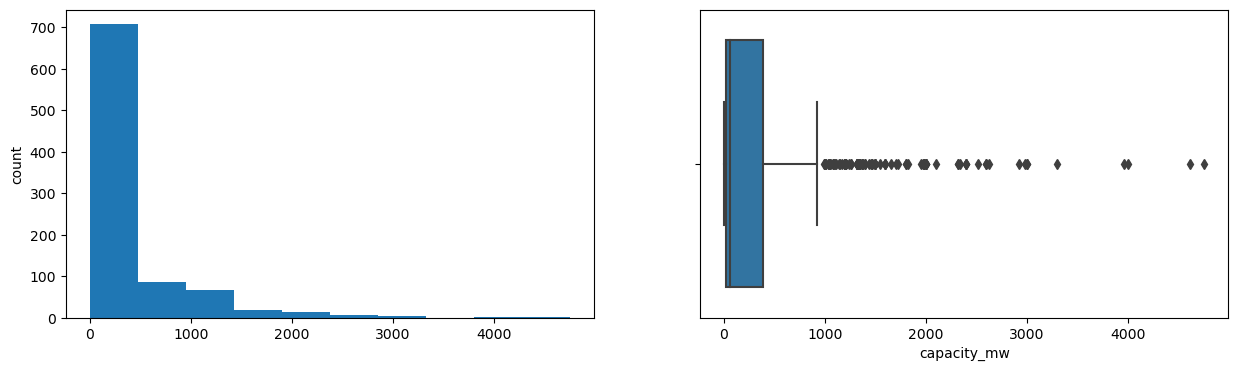

latitude
Skew : -0.15


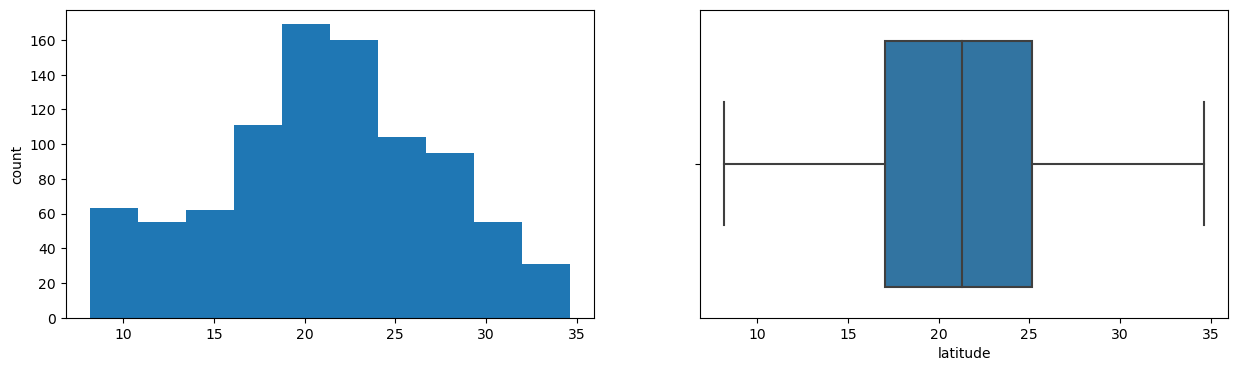

longitude
Skew : 1.14


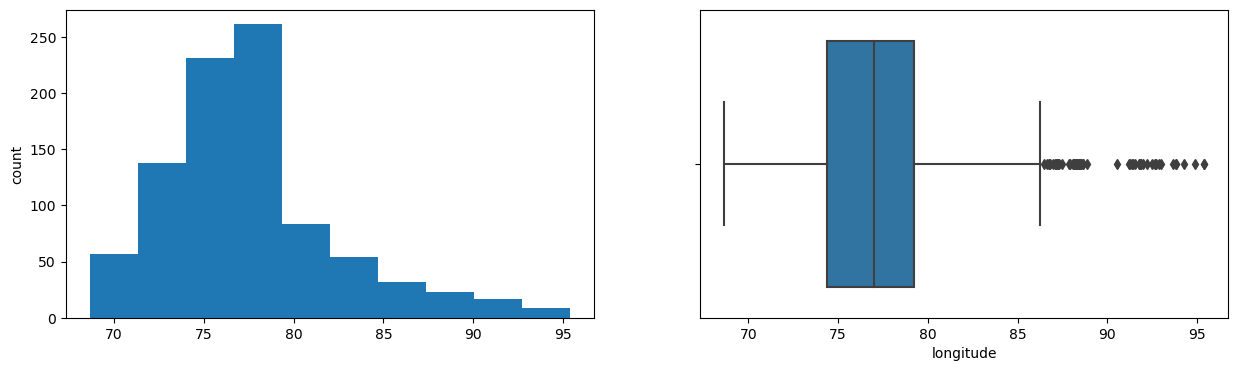

commissioning_year
Skew : -1.72


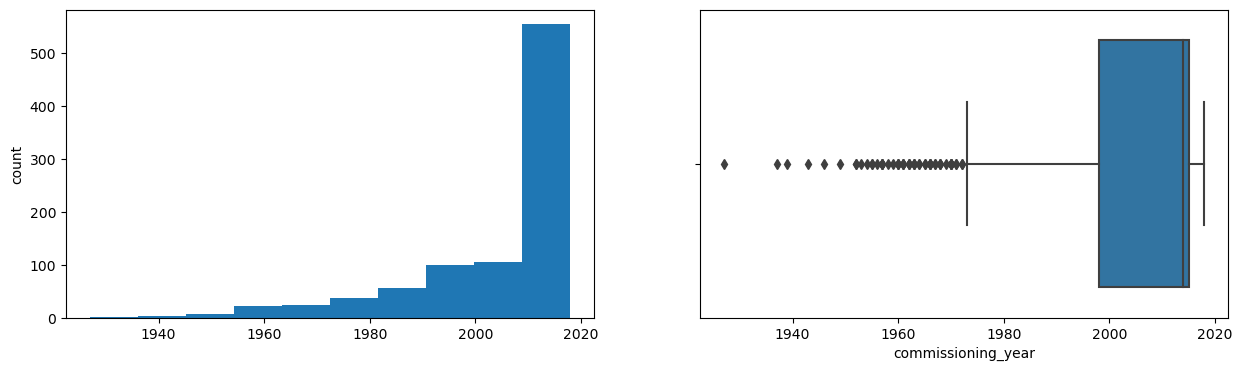

In [33]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Categorical Variables:
Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')


Numerical Variables:
['capacity_mw', 'latitude', 'longitude', 'commissioning_year']

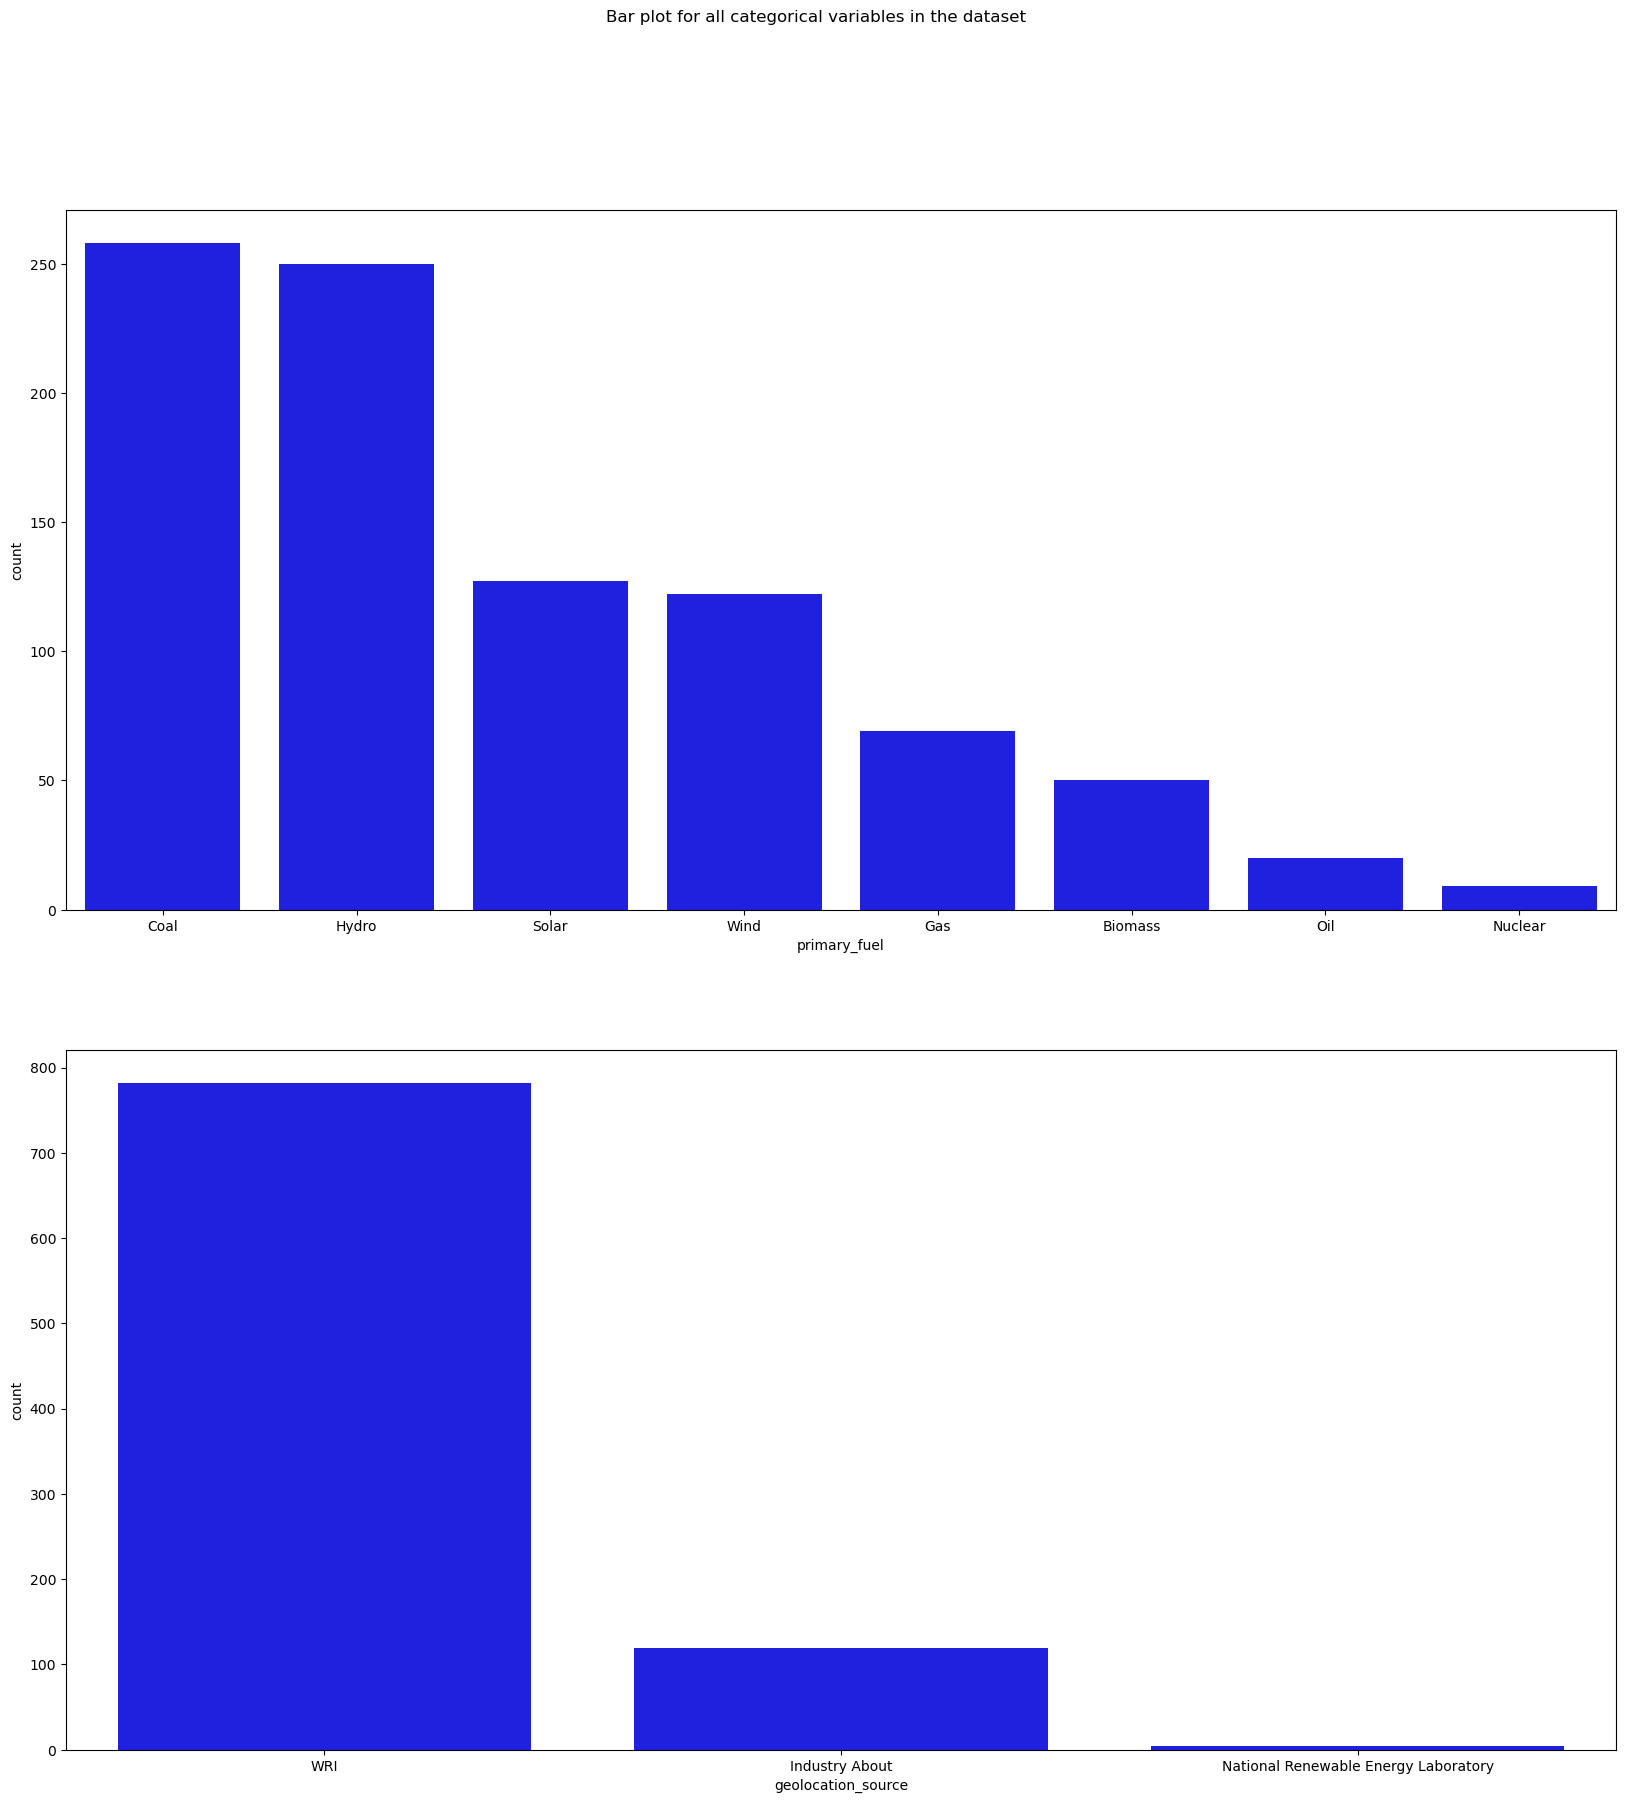

In [34]:
fig, axes = plt.subplots(2, 1, figsize = (20, 20))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'primary_fuel', data = df, color = 'blue', 
              order = df['primary_fuel'].value_counts().index);
sns.countplot(ax = axes[1], x = 'geolocation_source', data = df, color = 'blue', 
              order = df['geolocation_source'].value_counts().index);


array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

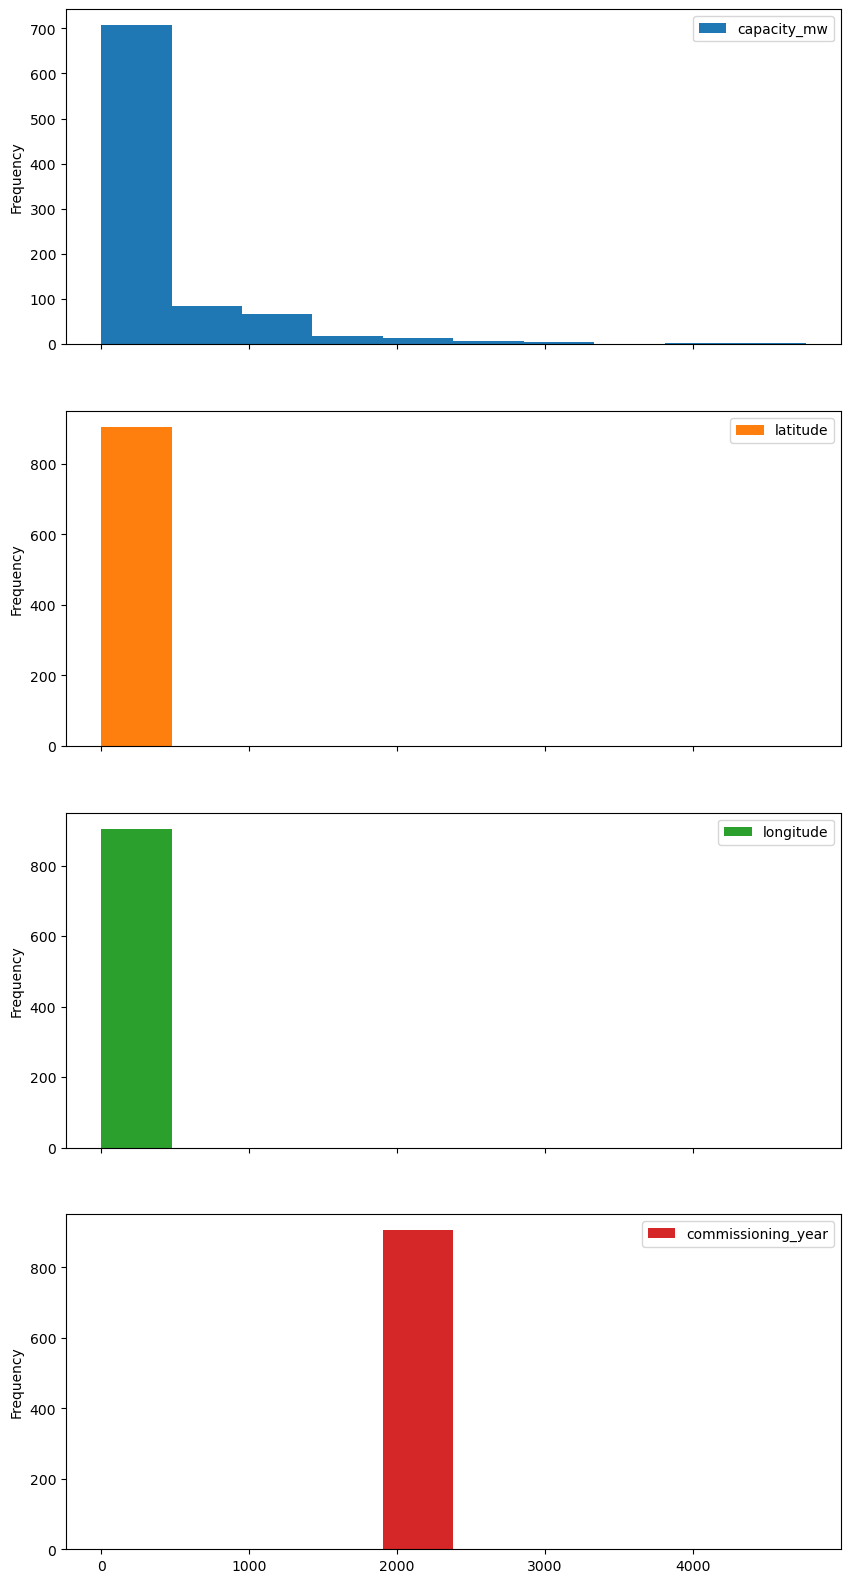

In [35]:
df.plot(kind='hist',subplots=True,layout=(4,1),figsize=(10,20))

## EDA Bivariate Analysis

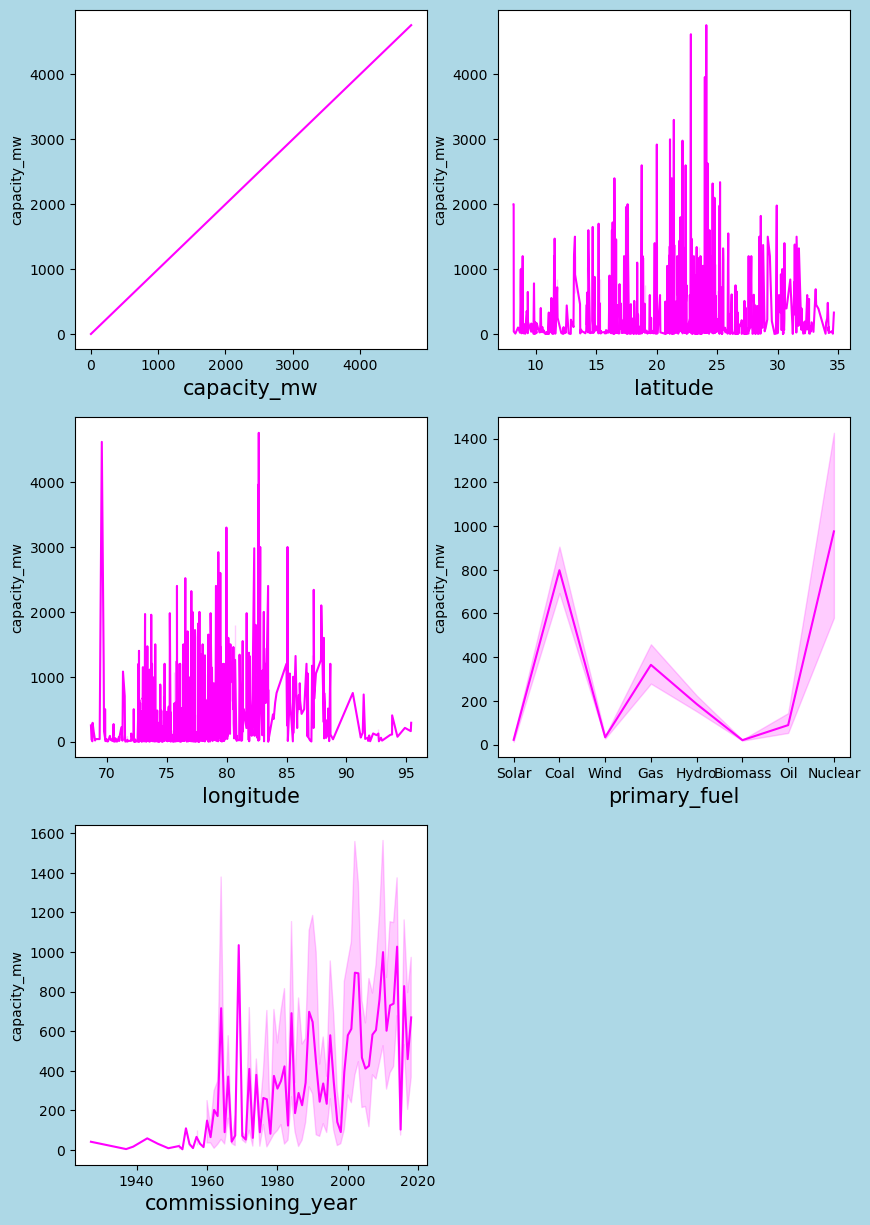

In [36]:
x=df.drop(['capacity_mw'],axis=1)
x=df.drop(['source'],axis=1)
plt.figure(figsize=(10,15),facecolor='lightblue')
pltno=1

for i in x.columns:
    if pltno<=5:
        ax=plt.subplot(3,2,pltno)
        sns.lineplot(x=i,y=df['capacity_mw'],data=df,color='magenta')
        plt.xlabel(i,fontsize=15)
        
    pltno+=1

In [37]:
#Categorical Variables:
#Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['source'] = le.fit_transform(df['source'])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])

df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2015.0,174,2
2,39.2,21.9038,69.3732,7,2015.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2


all categorial column has changed into numerical . so lets do multivariate analysis

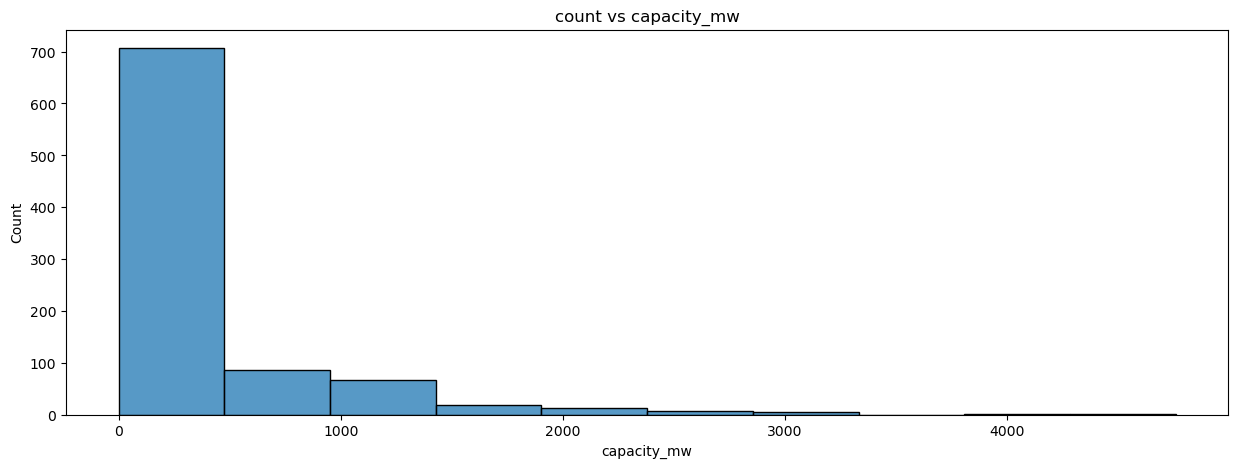

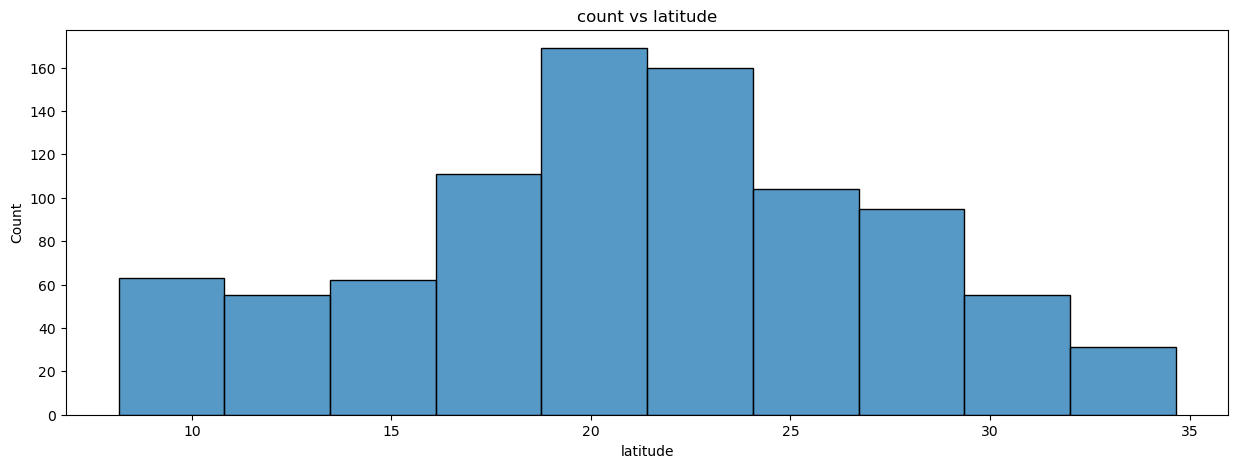

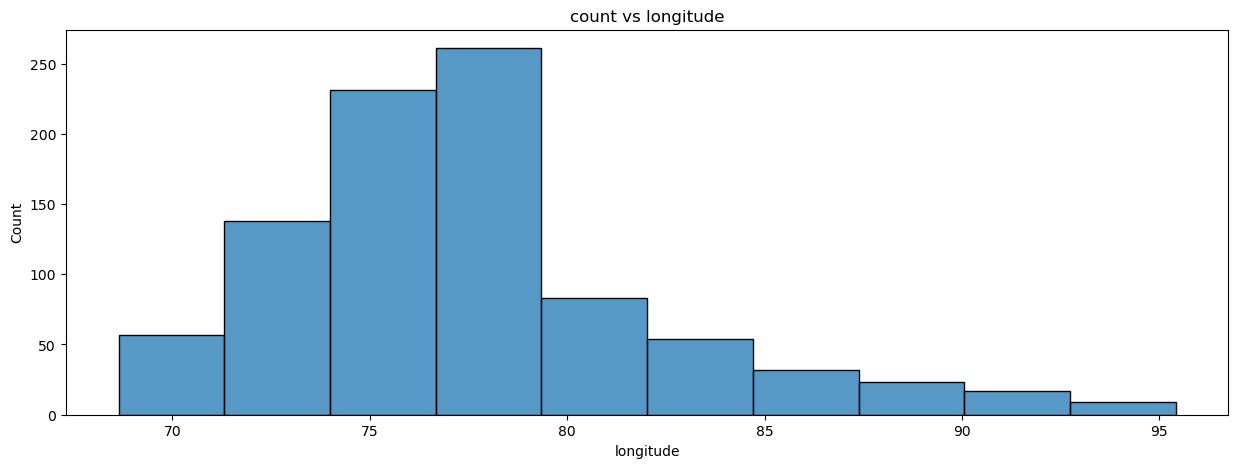

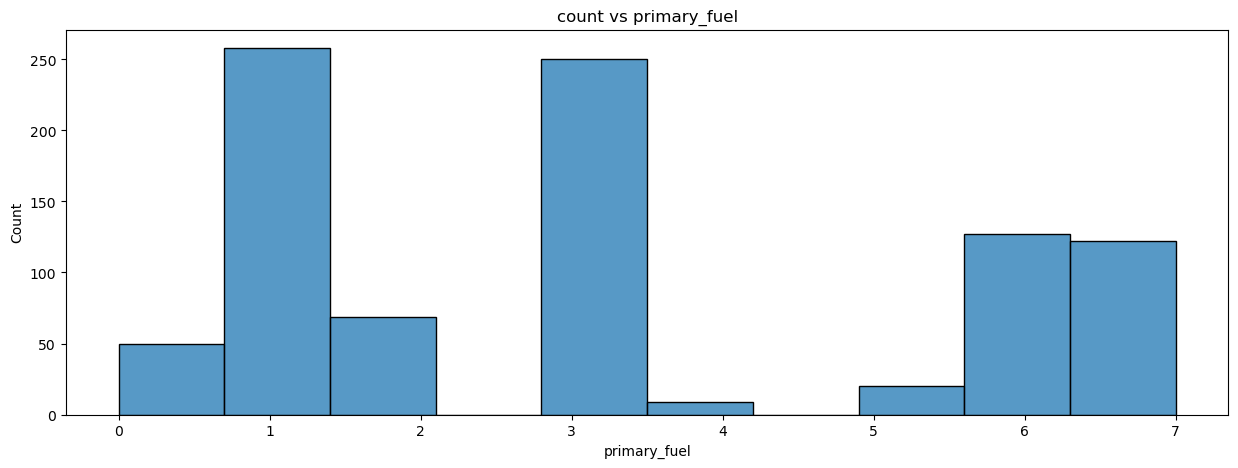

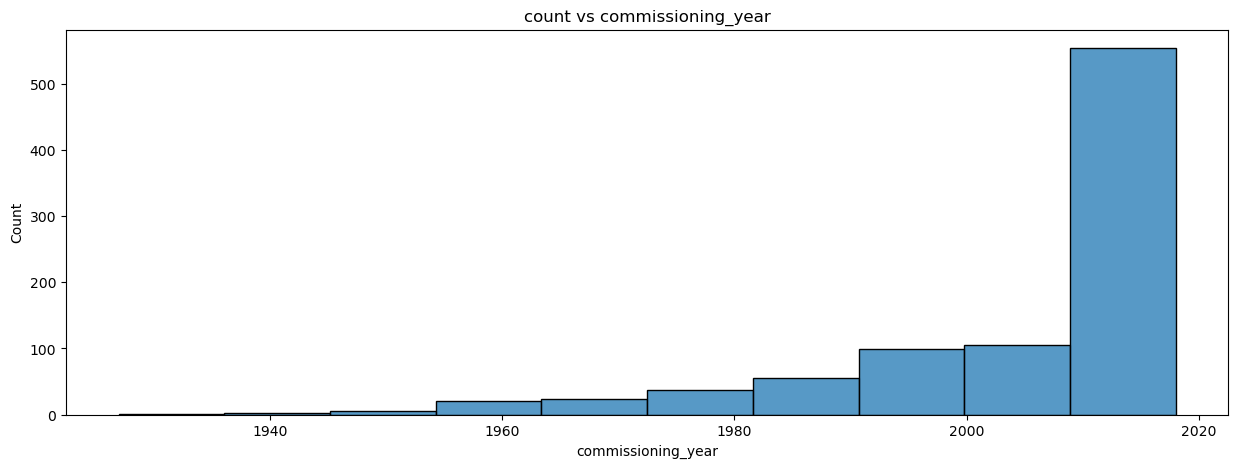

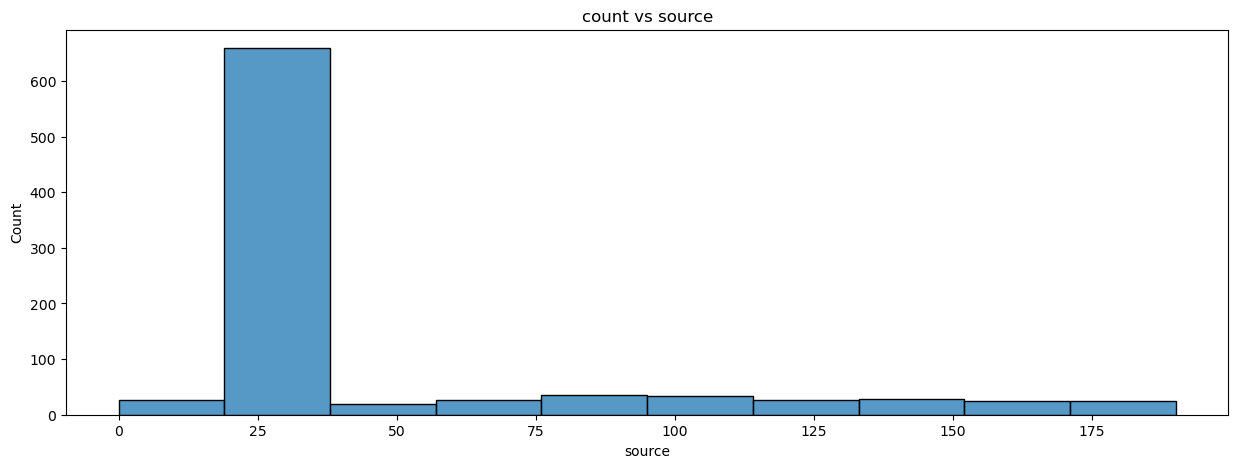

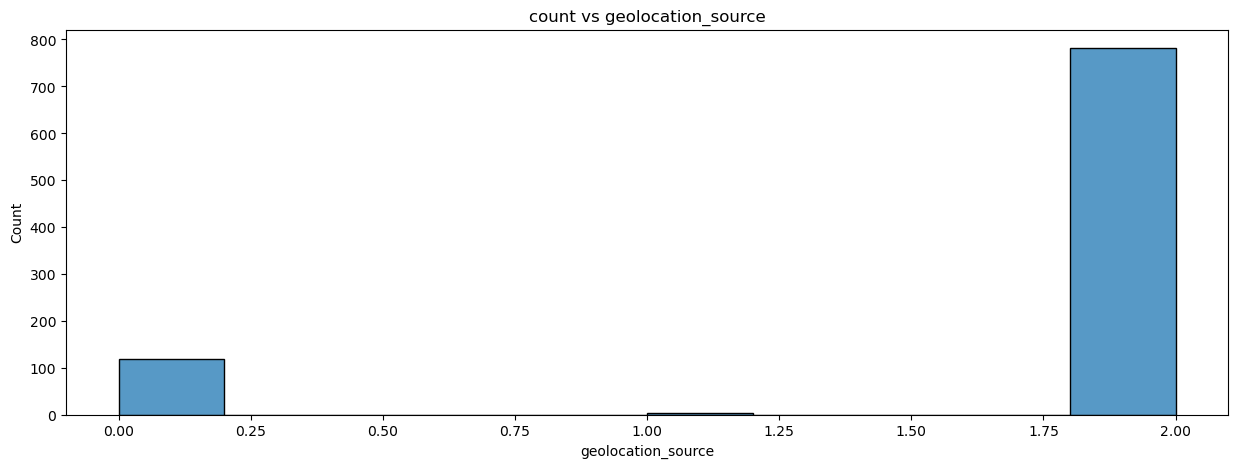

In [38]:
#HistPlot for columns vs count
for i in df.columns:
    plt.figure(figsize=(15,5))
    plt.title('count vs '+ i )
    sns.histplot(x=i,data=df,bins=10)
    plt.show()

<u>**From above plotting we can observation as mentioned below**</u>

- capacity_mw between `0 to 500` is highest.
- Latitude in between `19-21` is highest
- longitude between `76 to 79` is highest
- commissioning_year `1997` is highest.

### Pair Plot

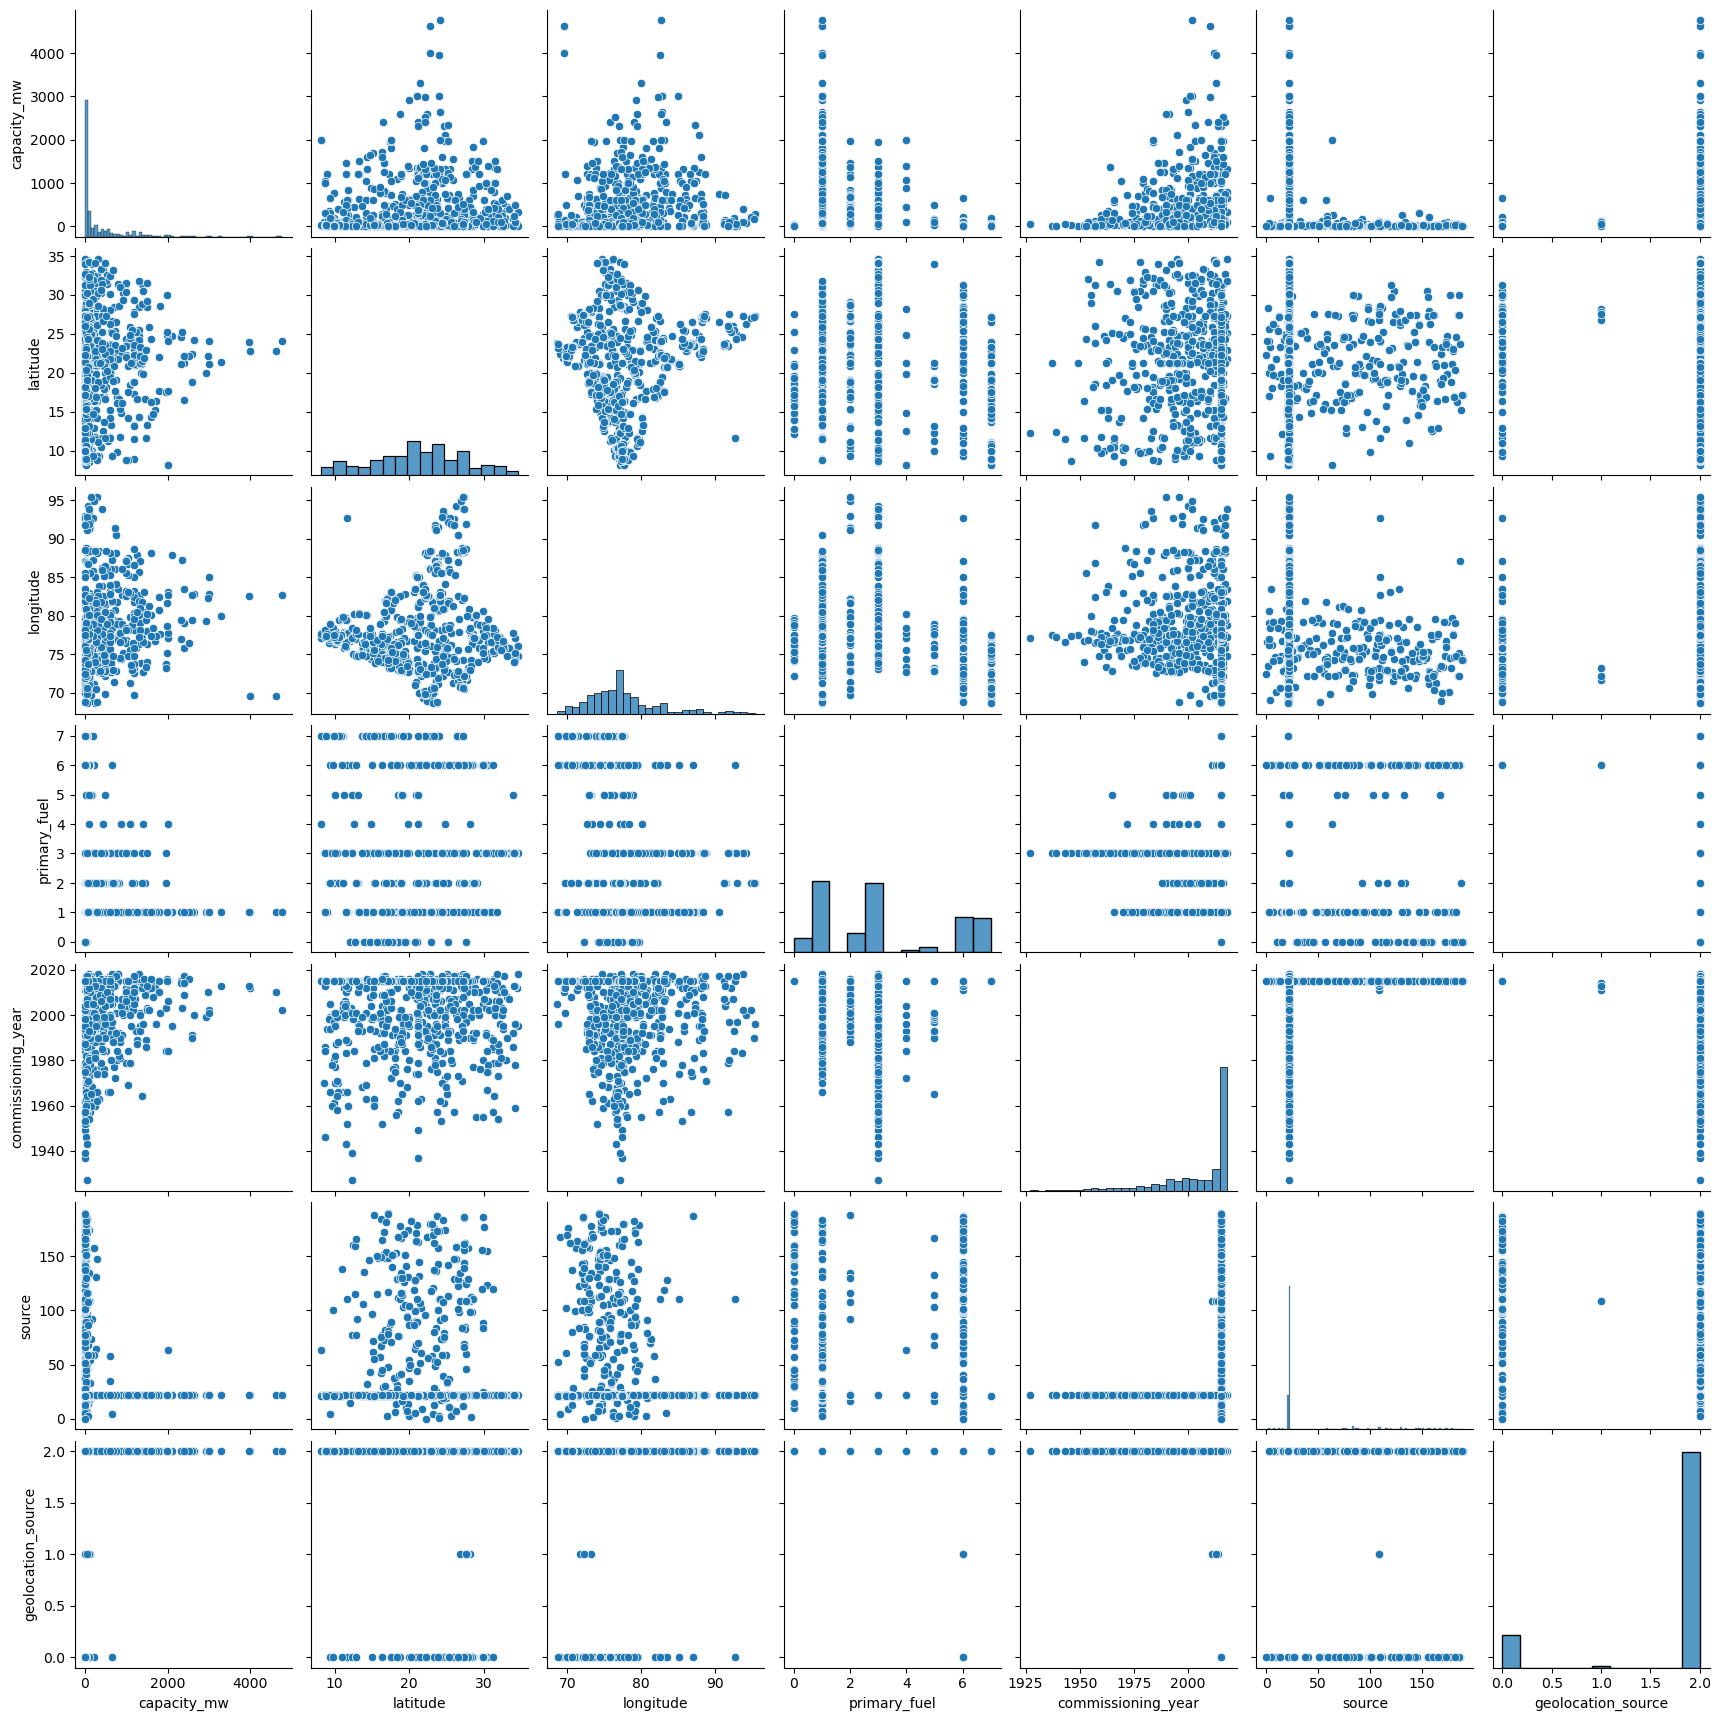

In [39]:
sns.pairplot(df)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,905.0,326.834029,590.593290,0.0000,16.5000,59.2000,388.0000,4760.000
latitude,905.0,21.186791,6.076636,8.1689,17.0587,21.2818,25.1732,34.649
longitude,905.0,77.465982,4.817503,68.6447,74.3862,76.9792,79.2086,95.408
primary_fuel,905.0,3.202210,2.279671,0.0000,1.0000,3.0000,6.0000,7.000
commissioning_year,905.0,2004.635359,15.668710,1927.0000,1998.0000,2014.0000,2015.0000,2018.000
source,905.0,43.897238,44.679778,0.0000,22.0000,22.0000,30.0000,190.000
geolocation_source,905.0,1.732597,0.677783,0.0000,2.0000,2.0000,2.0000,2.000


As per the above statistics, 
a few columns have huge numbers and it is difficult to assume anything by just looking at the table. Few features indicate that the value is greater than the median, indicating that the data is skewed to the right.

In [41]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.051848,0.195840,-0.380167,-0.005133,-0.242768,0.205359
latitude,0.051848,1.000000,0.036789,-0.010073,0.040329,0.056925,-0.185310
longitude,0.195840,0.036789,1.000000,-0.348510,-0.160556,-0.239515,0.252480
primary_fuel,-0.380167,-0.010073,-0.348510,1.000000,0.164561,0.054604,-0.484729
commissioning_year,-0.005133,0.040329,-0.160556,0.164561,1.000000,0.322761,-0.260325
source,-0.242768,0.056925,-0.239515,0.054604,0.322761,1.000000,-0.505511
geolocation_source,0.205359,-0.185310,0.252480,-0.484729,-0.260325,-0.505511,1.000000


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<AxesSubplot:>

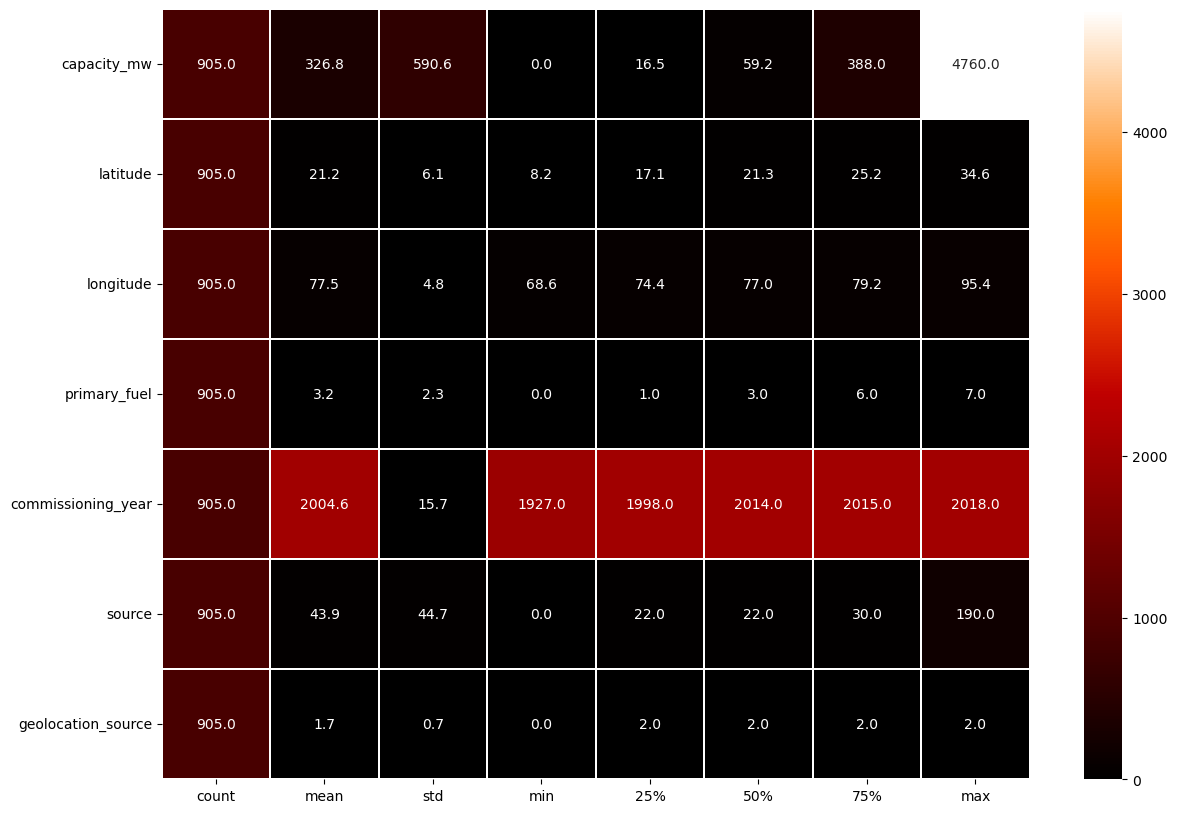

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().T,linewidth=0.3,fmt='0.1f' ,annot=True,cmap='gist_heat')

### Comment-

Statistical analysis reveals  right skewness in feature distributions. Consistent counts signify a complete dataset.
Potential outliers, especially in "capacity_mw", "commissioning year" and column "count" warrant attention.
Heatmap highlights the need for feature scaling.

## Visualizing the correlation matrix by plotting heat map.

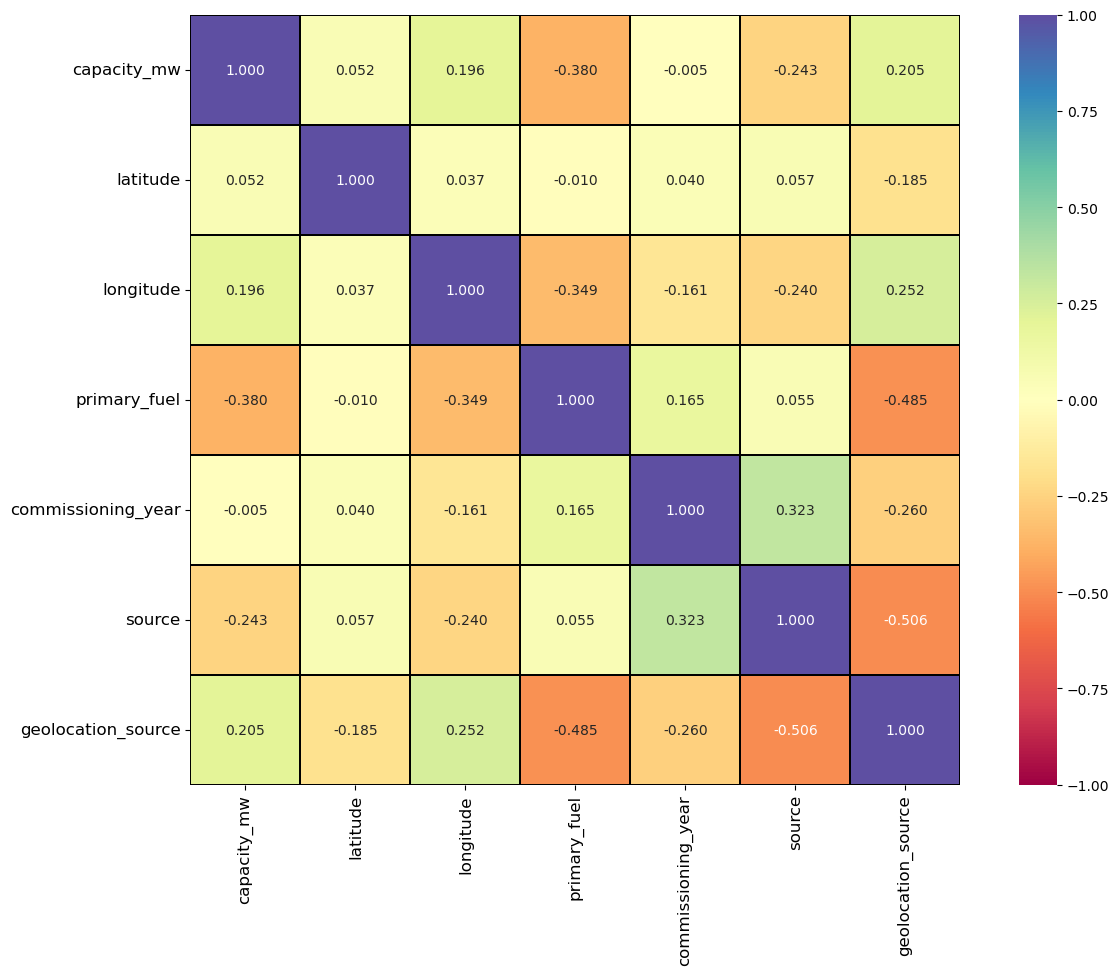

In [43]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From above heat map we can see multicollinearity issue between features Geo location source. We will drop these columns after cross checking coorrelation using VIF.

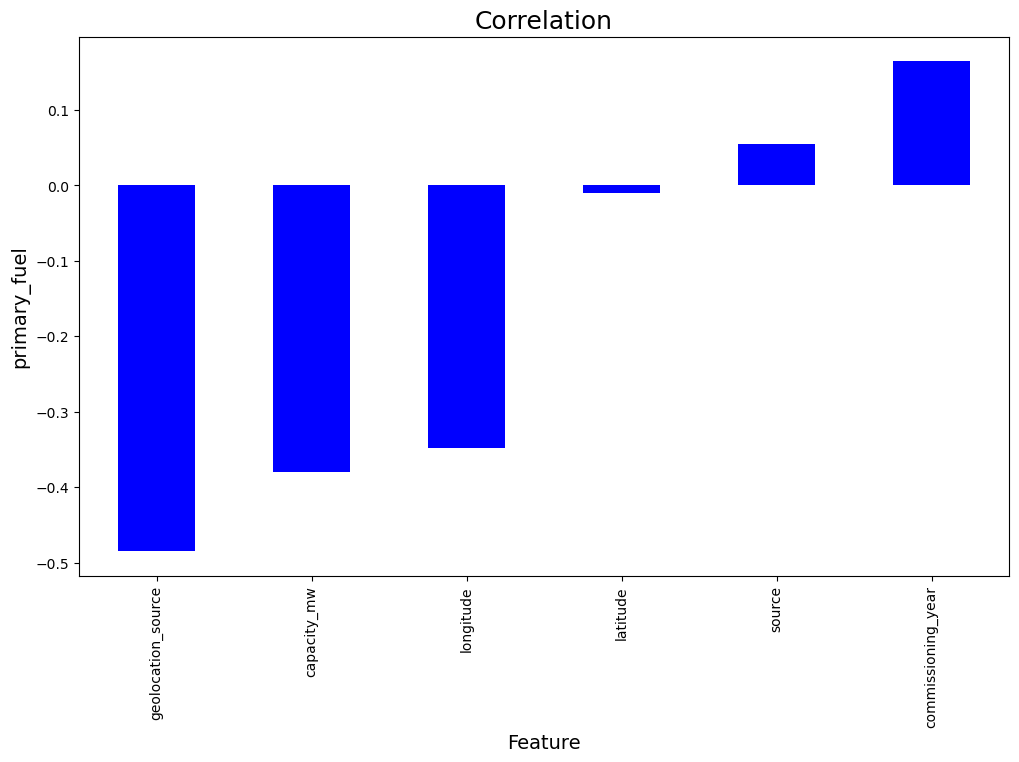

In [44]:
plt.figure(figsize=(12,7))
df.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('primary_fuel',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

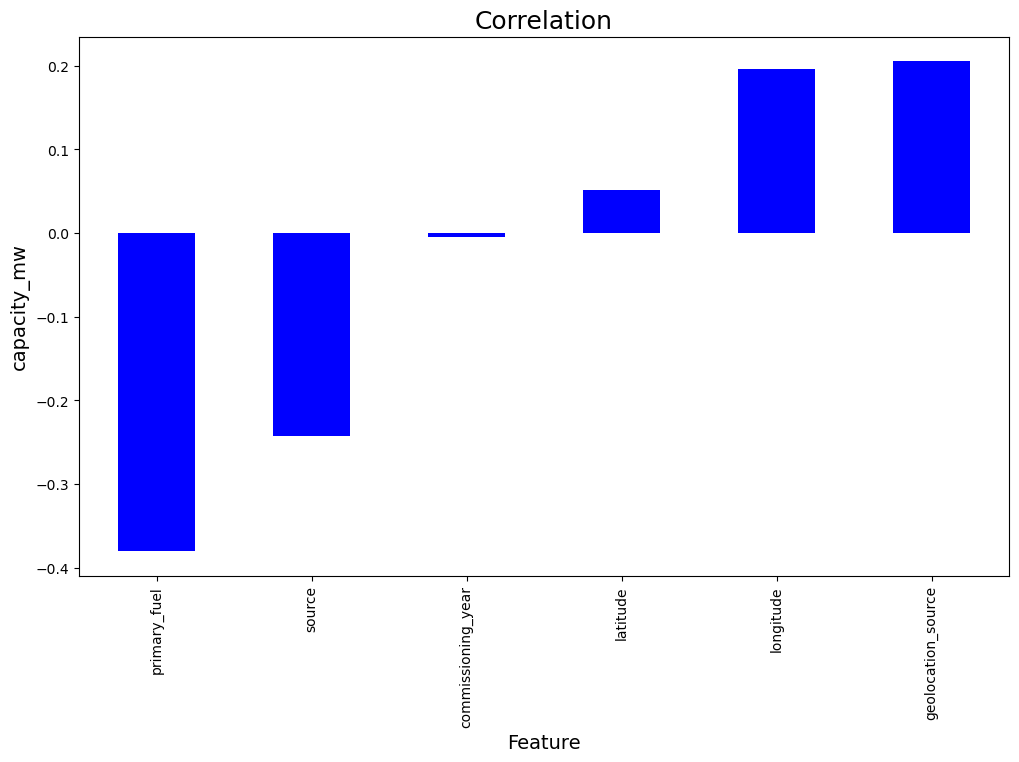

In [45]:
plt.figure(figsize=(12,7))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('capacity_mw',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

##### Observation:
    - some columns are negatively correlated with Target Column "primary_fuel" and "capacity_mw"
    - We can observe least correlation is with column "geolocation_source" and strong correlation is with column "latitude". 


### Checking Outliers

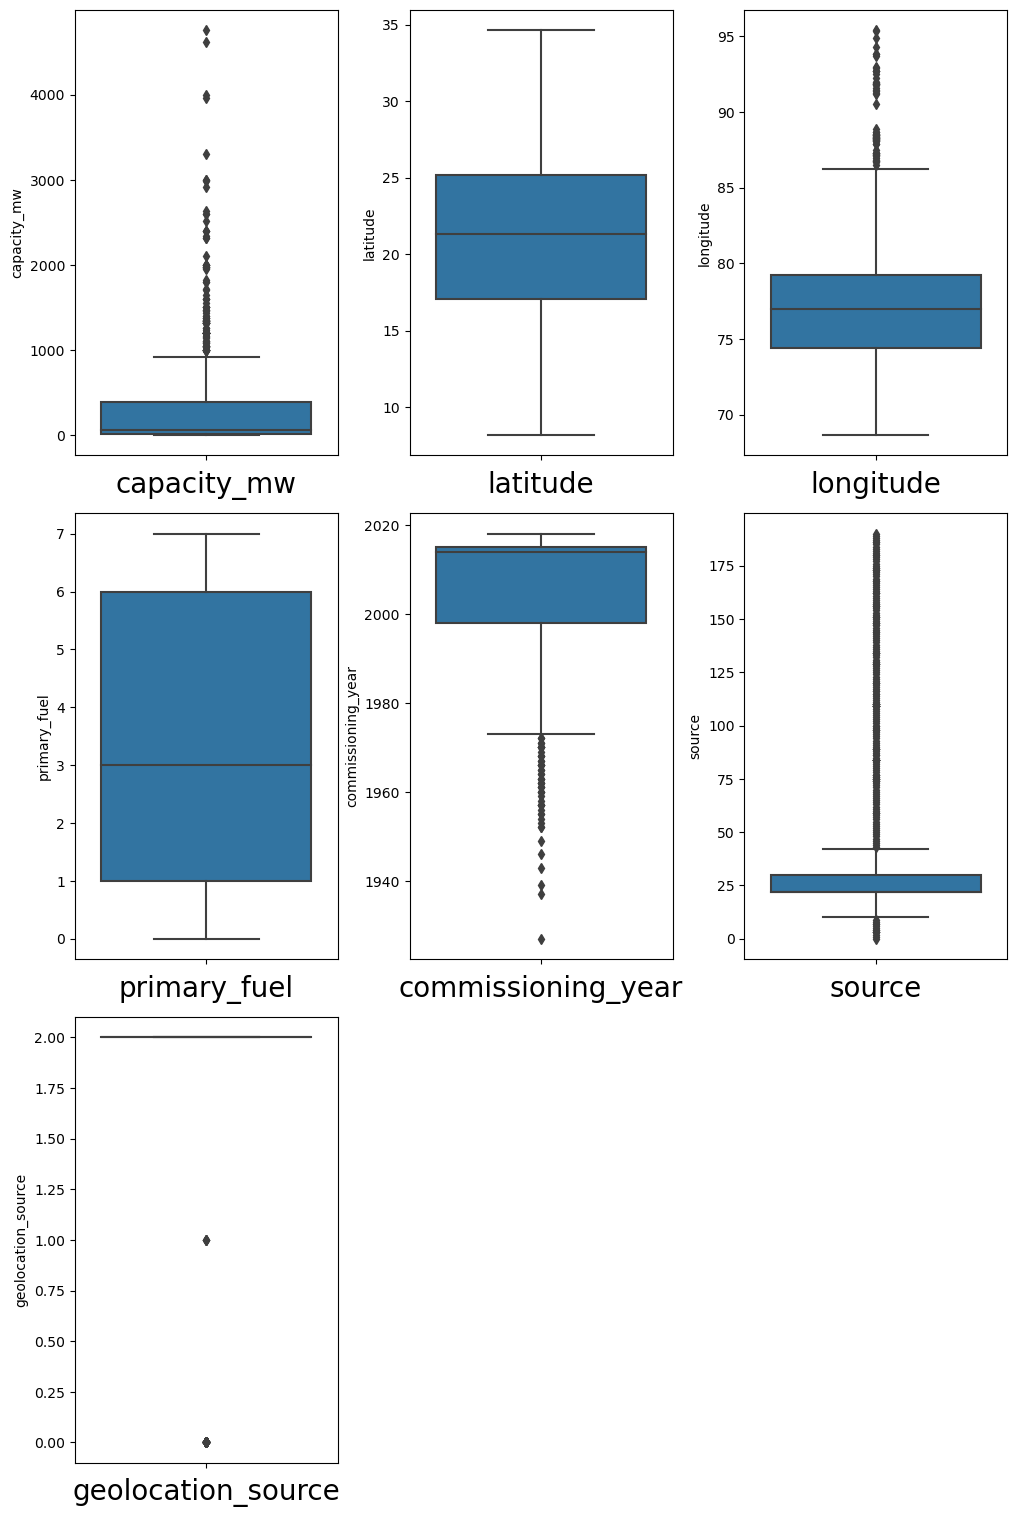

In [46]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1
#features = df.drop("primary_fuel", axis=1)
for column in df.columns: #column in features:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

### Observation:
    
- Outliers are present in columns: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source',"source".
- Outliers are not present in columns: 'latitude' and 'primary_fuel'
- But we will not remove Outliers from 'geolocation_source'  column as it is categorical column.
- Here we have to check two predictions : 'primary_fuel' and 'capacity_mw'. So we will remove outliers from 'capacity_mw' column when 'primary_fuel' is Target column and we will not remove outliers from it when 'capacity_mw' is Target column.

### Removing Outliers
> ##### Using Zscore method for Target Column "primary_fuel"

In [47]:
#  Outliers will be removed only from Continuous column variable: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
#variable = power_plant[[ 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

feature = df.drop("primary_fuel", axis=1)
z=np.abs(zscore(feature))

# Creating new dataframe for regression
global_plant = df[(z<3).all(axis=1)]
global_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2015.0,174,2
2,39.2,21.9038,69.3732,7,2015.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2


In [48]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",global_plant.shape)
print("Total Dropped rows:",df.shape[0]-global_plant.shape[0])

Old DataFrame data in Rows and Column: (905, 7)
New DataFrame data in Rows and Column: (838, 7)
Total Dropped rows: 67


### Percentage Data Loss using Zscore

In [49]:
loss_percent=(905-838)/905*100
print(loss_percent,"%")

7.403314917127071 %


##### Using Zscore method for Target Column "capacity_mw"

In [50]:
#  Outliers will be removed only from Continuous column variable: 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
# We will not remove outliers from Target column i.e; 'capacity_mw'

variable = df[[  'longitude', 'commissioning_year', 'geolocation_source',"source"]]

z1=np.abs(zscore(variable))

# Creating new dataframe for classification
global_power = df[(z1<3).all(axis=1)]
global_power.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2015.0,174,2
2,39.2,21.9038,69.3732,7,2015.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2


### Percentage Data Loss using Zscore

In [51]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",global_power.shape)
print("Total Dropped rows:",df.shape[0]-global_power.shape[0])
loss_percent1=(905-858)/905*100
print(loss_percent1,"%")

Old DataFrame data in Rows and Column: (905, 7)
New DataFrame data in Rows and Column: (858, 7)
Total Dropped rows: 47
5.193370165745857 %


# Checking for the skewness

In [52]:
#Target Column "primary_fuel"
global_plant.skew().sort_values()

geolocation_source   -2.112259
commissioning_year   -1.491474
latitude             -0.114604
primary_fuel          0.421718
longitude             0.920393
source                1.792258
capacity_mw           1.967232
dtype: float64

#### Observation: 
- Skewness threshold taken is +/-0.5
- All the columns are not normallly distributed
- Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', "source"
- The 'capacity_mw' column data is highly skewed
- Also we will not remove skewness from 'geolocation_source' as it contains categorical data.

#### Checking skewness through data visualization

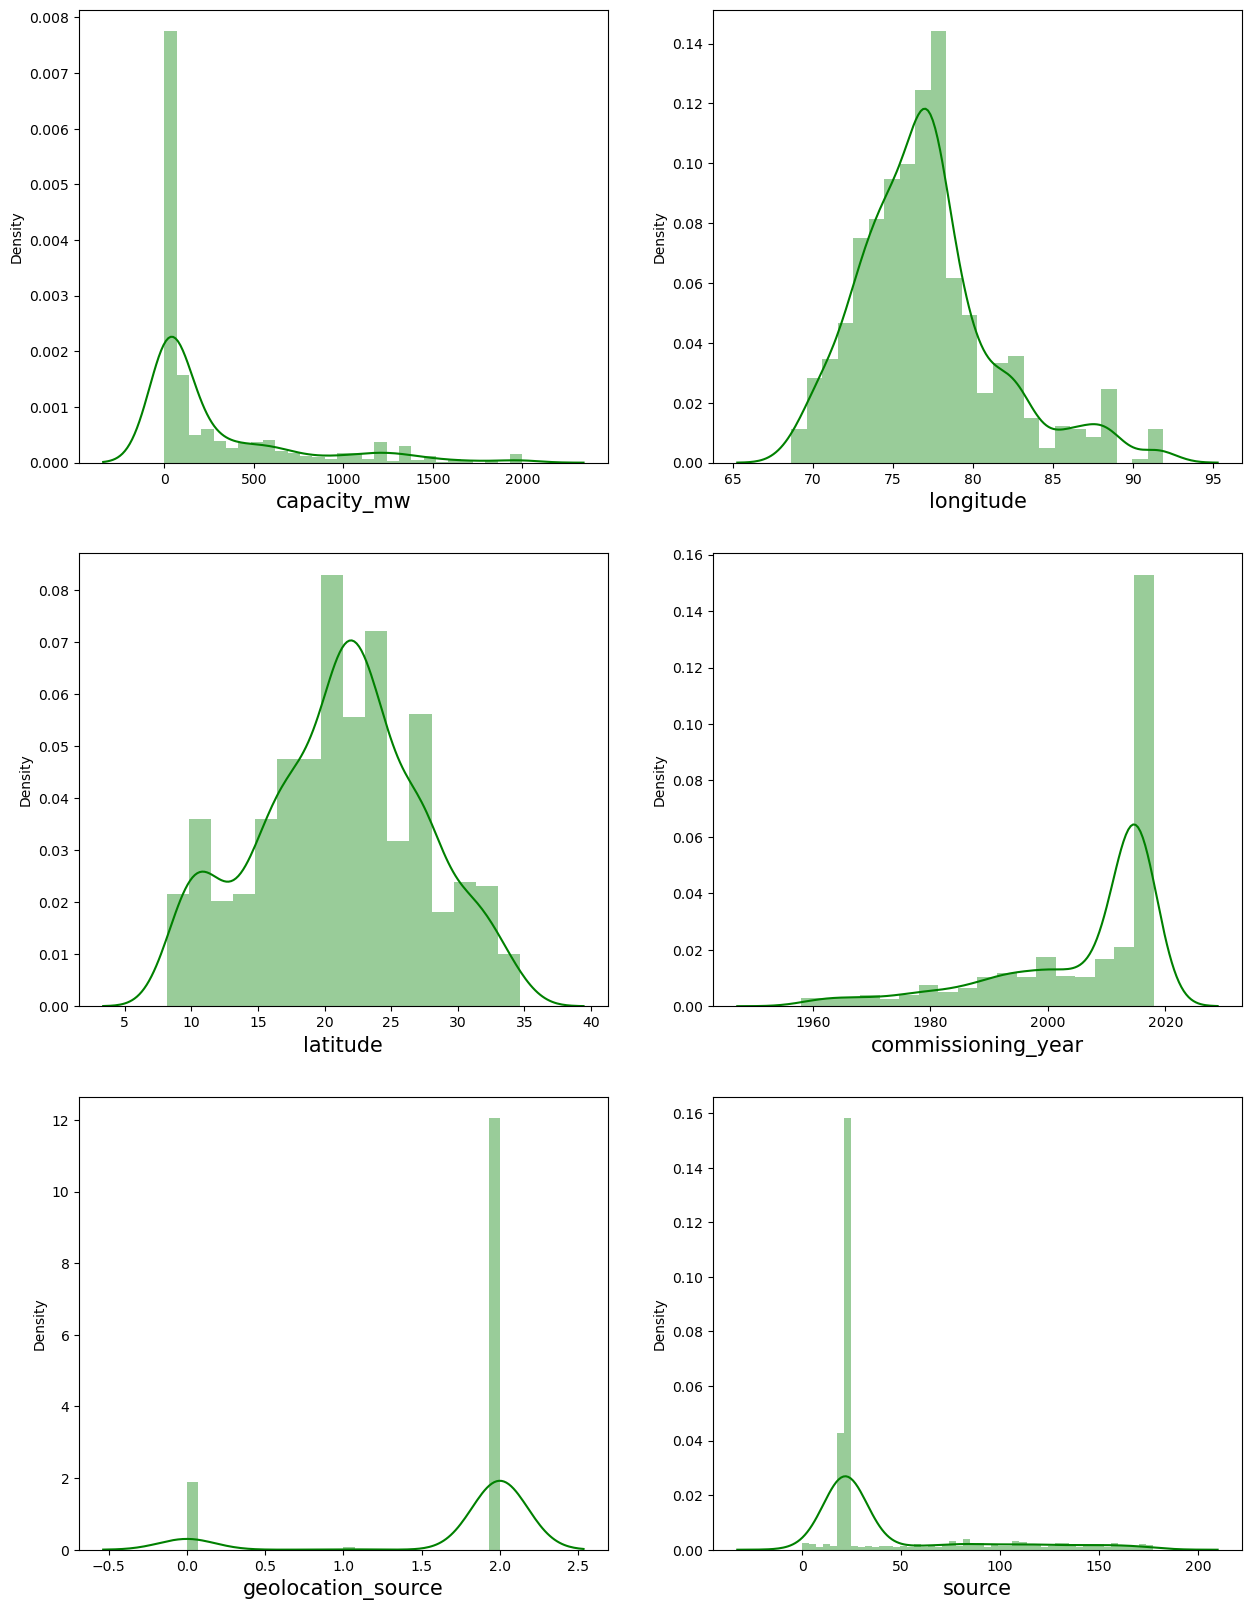

In [53]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', "source"]

plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1
for column in global_plant[collist]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(global_plant[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

In [54]:
#Target Column "capacity_mw"
global_power.skew()

capacity_mw           3.026225
latitude             -0.127959
longitude             0.872060
primary_fuel          0.459292
commissioning_year   -1.495239
source                1.830130
geolocation_source   -2.152087
dtype: float64

#### Observation: 
- Skewness threshold taken is +/-0.5
- All the columns are not normallly distributed
- Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', "source"
- The 'capacity_mw' column data is highly skewed but we will not remove skewness from it as it is a Target column.
- Also we will not remove skewness from 'primary_fuel' and 'geolocation_source' as it contains categorical data.

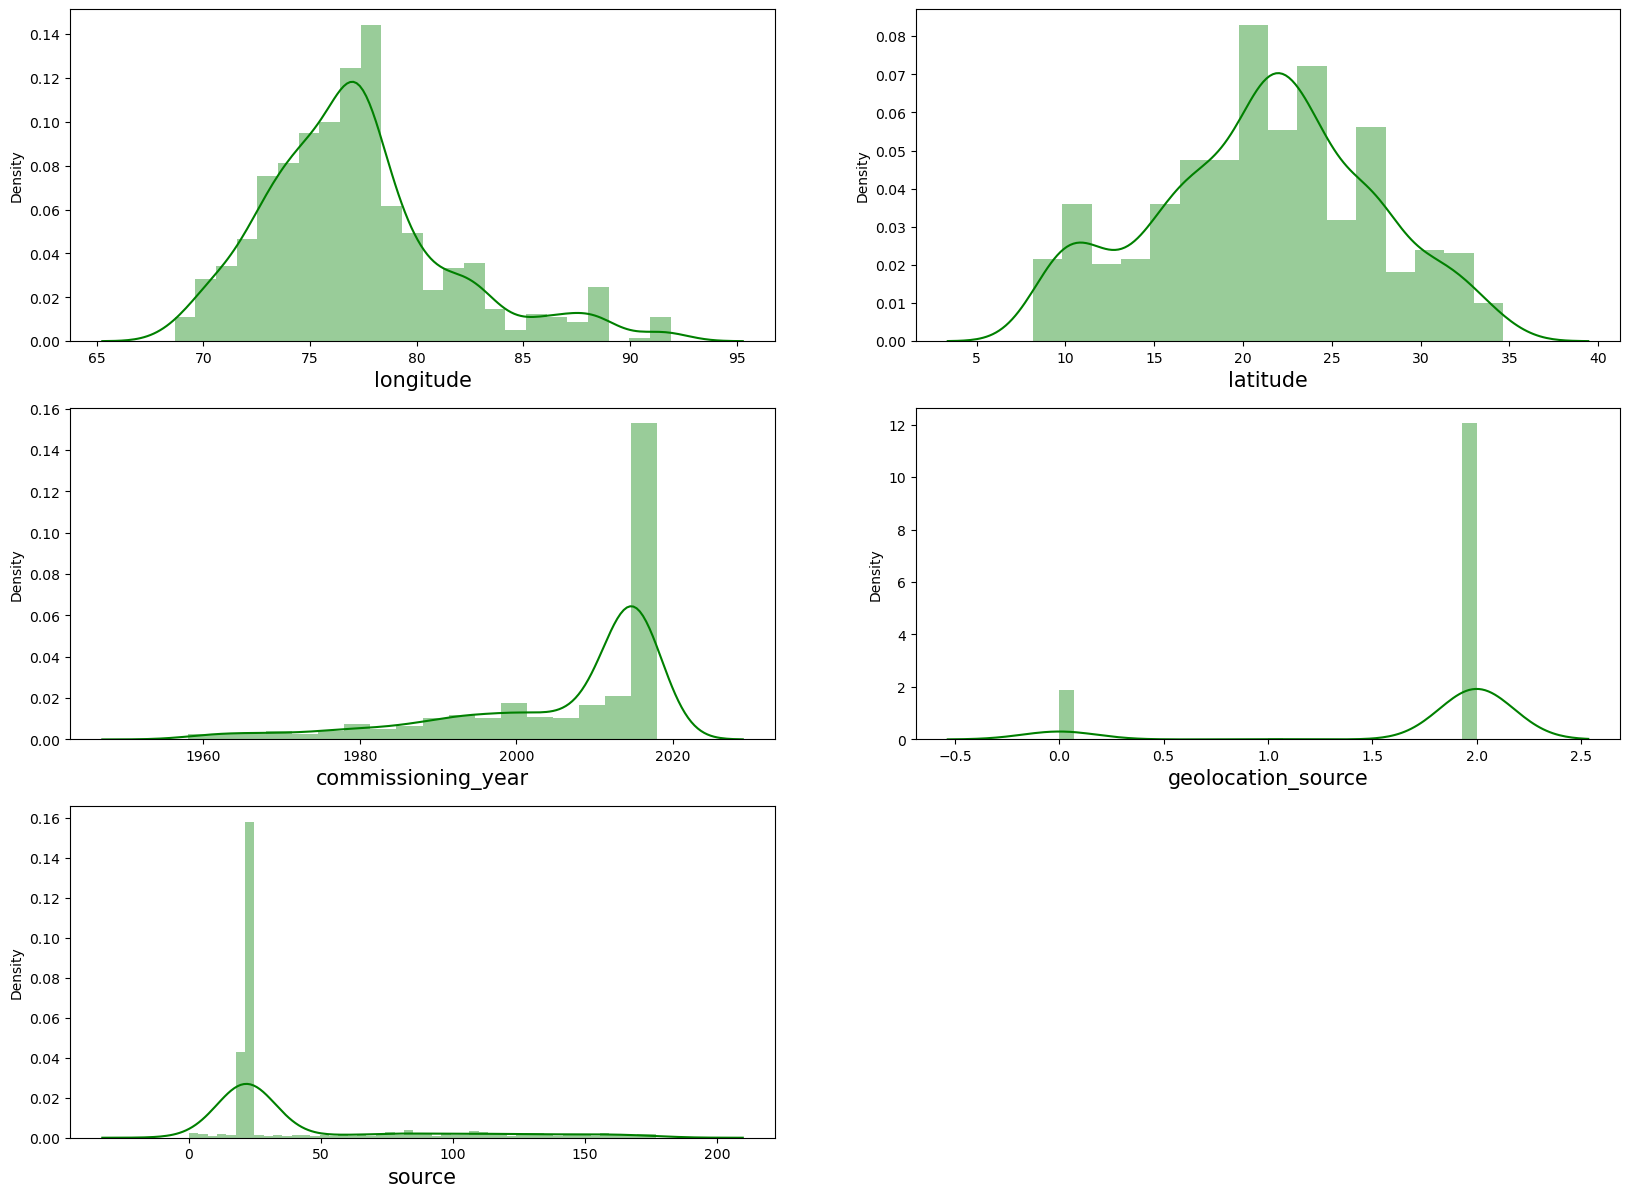

In [55]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source',"source"]

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Removing skewness

Target Column is "primary_fuel"

In [56]:
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source']

In [57]:
for col in collist:
    if global_plant.skew().loc[col]>0.55:
        global_plant[col]=np.log1p(global_plant[col])

In [58]:
global_plant.skew().sort_values()

geolocation_source   -2.112259
commissioning_year   -1.491474
latitude             -0.114604
capacity_mw           0.064247
primary_fuel          0.421718
longitude             0.736930
source                1.792258
dtype: float64

In [59]:
global_plant["source"] = np.cbrt(global_plant["source"])

In [61]:
global_plant["source"] = np.cbrt(global_plant["source"])

In [62]:
global_plant.skew().sort_values()

geolocation_source   -2.112259
commissioning_year   -1.491474
source               -0.653186
latitude             -0.114604
capacity_mw           0.064247
primary_fuel          0.421718
longitude             0.736930
dtype: float64

#### Target Column is "capacity_mw"

In [63]:
collist=["capacity_mw",'longitude',"longitude","source",'commissioning_year', 'geolocation_source']

In [64]:
for col in collist:
    if global_power.skew().loc[col]>0.55:
        global_power[col]=np.log1p(global_power[col])

In [65]:
global_power.skew().sort_values()

geolocation_source   -2.152087
commissioning_year   -1.495239
latitude             -0.127959
capacity_mw           0.096794
primary_fuel          0.459292
longitude             0.659462
source                0.821011
dtype: float64

In [66]:
global_power.skew().sort_values()

geolocation_source   -2.152087
commissioning_year   -1.495239
latitude             -0.127959
capacity_mw           0.096794
primary_fuel          0.459292
longitude             0.659462
source                0.821011
dtype: float64

### Now skewness reduced

#### Splitting data in X&Y

In [67]:
x = global_plant.drop('primary_fuel', axis=1)
y = global_plant['primary_fuel']

## Scaling data with Standard scalar for Primary fuel target

In [68]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.641191,1.154079,-0.903897,0.386906,1.606549,-1.059632
1,0.185141,0.597383,-0.568118,0.673011,2.269761,0.400848
2,-0.307322,0.131109,-1.887545,0.673011,-0.472499,0.400848
3,0.358649,0.451580,3.111292,-0.113776,-0.418840,0.400848
4,1.770295,0.140312,1.237053,0.673011,-0.418840,0.400848


scaled data using standard scaler.

## Checking Multicollinearity using VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Value
0,capacity_mw,1.451832
1,latitude,1.069732
2,longitude,1.170336
3,commissioning_year,1.126379
4,source,1.291741
5,geolocation_source,1.552796


vif value is less than 10. so the value is acceptance range

#### Splitting data in X&Y

In [70]:
x1 = global_power.drop('capacity_mw', axis=1)
y1 = global_power['capacity_mw']

## Scaling data with Standard scalar for capacity_mw target

In [71]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.161116,-0.915308,1.202215,0.388682,1.727872,-1.079637
1,0.598852,-0.578663,-0.963893,0.676981,2.371443,0.395409
2,0.127914,-1.908204,1.635437,0.676981,-0.502961,0.395409
3,0.451590,3.036412,-0.530671,-0.115840,-0.441346,0.395409
4,0.137209,1.211610,-0.963893,0.676981,-0.441346,0.395409


scaled data using standard scaler.

## Checking Multicollinearity using VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Value"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Value
0,latitude,1.057605
1,longitude,1.260555
2,primary_fuel,1.592914
3,commissioning_year,1.140723
4,source,1.456219
5,geolocation_source,1.812391


vif value is less than 10. so the value is acceptance range

In [73]:
global_plant.head(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.252763,28.1839,4.307313,6,2011.0,1.684150,1
1,4.595120,24.7663,4.325575,1,2015.0,1.773985,2
2,3.693867,21.9038,4.253813,7,2015.0,1.402534,2


In [74]:
global_power.head(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.252763,28.1839,1.669086,6,2011.0,4.700480,1
1,4.595120,24.7663,1.672521,1,2015.0,5.164786,2
2,3.693867,21.9038,1.658954,7,2015.0,3.091042,2


In [75]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.641191,1.154079,-0.903897,0.386906,1.606549,-1.059632
1,0.185141,0.597383,-0.568118,0.673011,2.269761,0.400848
2,-0.307322,0.131109,-1.887545,0.673011,-0.472499,0.400848
3,0.358649,0.451580,3.111292,-0.113776,-0.418840,0.400848
4,1.770295,0.140312,1.237053,0.673011,-0.418840,0.400848


In [76]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [77]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.161116,-0.915308,1.202215,0.388682,1.727872,-1.079637
1,0.598852,-0.578663,-0.963893,0.676981,2.371443,0.395409
2,0.127914,-1.908204,1.635437,0.676981,-0.502961,0.395409
3,0.451590,3.036412,-0.530671,-0.115840,-0.441346,0.395409
4,0.137209,1.211610,-0.963893,0.676981,-0.441346,0.395409


In [78]:
y1.head()

0    1.252763
1    4.595120
2    3.693867
3    4.912655
4    7.496097
Name: capacity_mw, dtype: float64

In [79]:
x.shape, y.shape

((838, 6), (838,))

In [80]:
y.value_counts()

1    234
3    223
7    122
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [81]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [82]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [83]:
y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

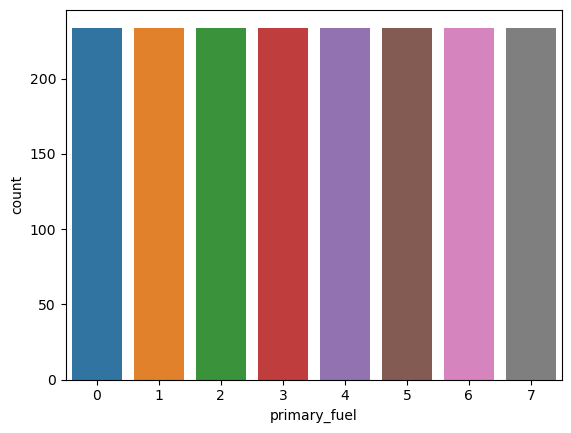

In [84]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Modeling for Primary_fuel

#### Finding best random state

We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw 

In [85]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [86]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9444444444444444 on Random State: 45


So the best random state is 45 and thr Accuracy is 94.44%

In [87]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=45)

## Models with their metrics

In [88]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For GaussianNB()  Accuracy score is:  0.5833333333333334

 Confusion matrix: 
 [[69  0  1  0  0  0  0  0]
 [ 6  6  1 37  0  1  0  0]
 [ 4  0  0 32  0  0  0  0]
 [ 0  0  0 73  0  0  0  0]
 [ 0  4  1 54  4  0  0  0]
 [22  0  0 32  0  1  0  0]
 [ 0  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 62]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.99      0.81        70
           1       0.60      0.12      0.20        51
           2       0.00      0.00      0.00        36
           3       0.32      1.00      0.49        73
           4       1.00      0.06      0.12        63
           5       0.50      0.02      0.04        55
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        62

    accuracy                           0.58       468
   macro avg       0.64      0.52      0.46       468
weighted avg       0.67      0.58      0.49       468

Cross Validation Score= 0

We can see that the best working model is the Random forest classifer = 94.87%

We see from above that random forest classifier is working the best, so we will use hyperparameter tuning on it

## Hyperparameter Tuning  

In [89]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
rfc=RandomForestClassifier()
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt'}

In [90]:
y

0       6
1       1
2       7
3       2
4       1
       ..
1867    7
1868    7
1869    7
1870    7
1871    7
Name: primary_fuel, Length: 1872, dtype: int32

In [91]:
final_model=RandomForestClassifier(max_features='sqrt',max_depth=100)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 95.08547008547008


after hyper parameter tuning , accuracy will raise to 95.08%

## Confusion Matrix

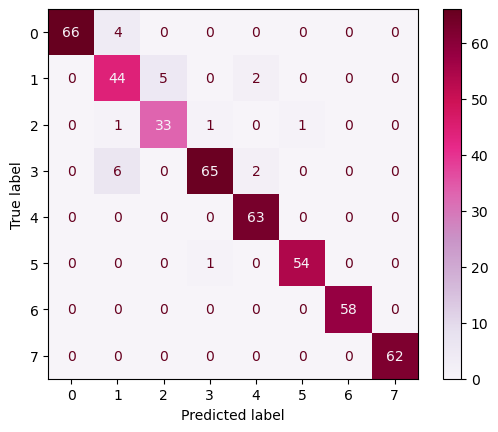

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='PuRd')

## ROC-AUC Curve

In [93]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [94]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

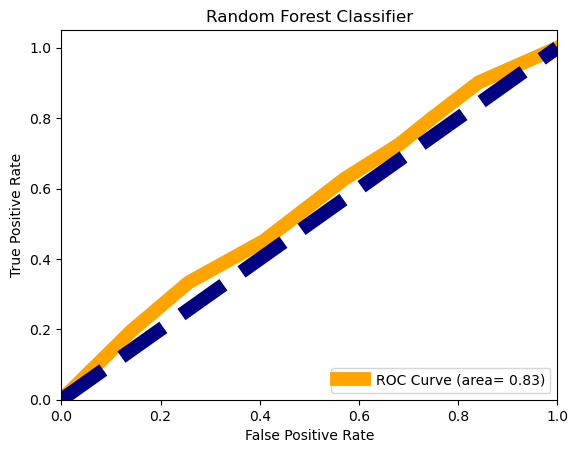

In [95]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [96]:
x.head(2)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.641191,1.154079,-0.903897,0.386906,1.606549,-1.059632
1,0.185141,0.597383,-0.568118,0.673011,2.269761,0.400848


In [97]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2015.0,174,2


In [98]:
#BULDING THE PREDICTION SYSTEM
input_data = (98,24.7663,74.6090,2015,174,2)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted primary_fuel data:",str(prediction))

Predicted primary_fuel data: [1]


### getting right prediction. so let's save the model

# Saving the trained model

In [99]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"Global_Power_Plant_primary_fuel.pkl")

['Global_Power_Plant_primary_fuel.pkl']

In [100]:
hs= joblib.load(open('Global_Power_Plant_primary_fuel.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

95.08547008547008


In [101]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

,original,predicted
0,7,7
1,7,7
2,6,6
3,3,3
4,3,1
5,3,3
6,2,2
7,0,0
8,0,0
9,2,2


### the above results shows that 95.08% results were predicted accurately as per the model.

# Target column is "capacity_mw"

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y1)
print(y_encoded)

[  9 166 114 188 324 218 137 204 224 210 310 187 303  54  30 336 244 263
 303  34  55  72 269 263 123 127   1  53 127 179  62  45  18  18  18  18
  18  18  18 275  83 252 252 201 295 263 257 146  34 225 231  40 227  88
 137  63  63 303 117 276 159 307 159 218 182 225 145  18  63 220  70  75
  34  57 322  79 116 313  50 101  52  50 256  88  88  88  88 256 225 156
 153 304  34 168 256 149 263  21  63 256 210 278 115 137 197 278 150 157
 263   1   1  38  50  34  18  18  63  50 108  34   1   3  73 128 192  18
 167  10 115  15   1 137 225 260 214 115 104 215 182  34 266 337 107  13
  96 331 216 191 120 178  72  18 212  65  18 271 325 284 169 169 320  74
  88  72 291 303 303 100 130 256 263 223 229 262  68 164  18  44 147  74
  72  68 239  43 210 292  18 183   5 110  84  74  18 183 169   1  50  69
  30 258  38 148  63 153 330 248  16 226 113 282 104  36 213 268  50 266
 180 254 182  71  69  94 218 290  88 137  71 263 208 260  74 279 135  50
  77  10  18   1 127   1  18  26   4  83  18  10 26

In [125]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [127]:
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y)

### Finding the best random state among all the models

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [129]:
model=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(), GradientBoostingRegressor(),XGBRegressor()]

In [130]:
maxAcc = 0
for m in model:
    for i in range(1,100):
        xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size = .25, random_state=i)
        m.fit(xtrain,ytrain)
        m.score(xtrain,ytrain)
        pred = m.predict(xtest)
        acc = r2_score(ytest,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9741621480743329 on Random State: 45


__At random state 45, we are getting best accuracy score i.e., 97.41%__

### Creating train-test-split

In [131]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=45)

In [132]:
x1.shape, y1.shape

((1872, 6), (1872,))

In [133]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1404, 6), (1404,), (468, 6), (468,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. 

In [134]:
for m in model:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.3277416731747794
Mean absolute error:  1.570485515709371
Mean squared error:  3.643753451291092
Cross Validation Score= -2.151722549267462 

 For Ridge() 
R2 score : 0.32784738774068134
Mean absolute error:  1.5705752096459047
Mean squared error:  3.6431804605240212
Cross Validation Score= -2.151159474870001 

 For Lasso() 
R2 score : -0.0002530810796343985
Mean absolute error:  2.006568534346312
Mean squared error:  5.421540308114383
Cross Validation Score= -3.06732616885019 

 For DecisionTreeRegressor() 
R2 score : 0.9101172811791631
Mean absolute error:  0.20085470085470086
Mean squared error:  0.48717948717948717
Cross Validation Score= 0.2217236247229283 

 For RandomForestRegressor() 
R2 score : 0.9607914628938118
Mean absolute error:  0.20762820512820515
Mean squared error:  0.21251688034188032
Cross Validation Score= 0.470836841156763 

 For KNeighborsRegressor() 
R2 score : 0.9151475596535222
Mean absolute error:  0.26965811965811964
Mean

found RandomForestRegressor R2 score is high = 96.07%

### Checking the performance of the model by graph

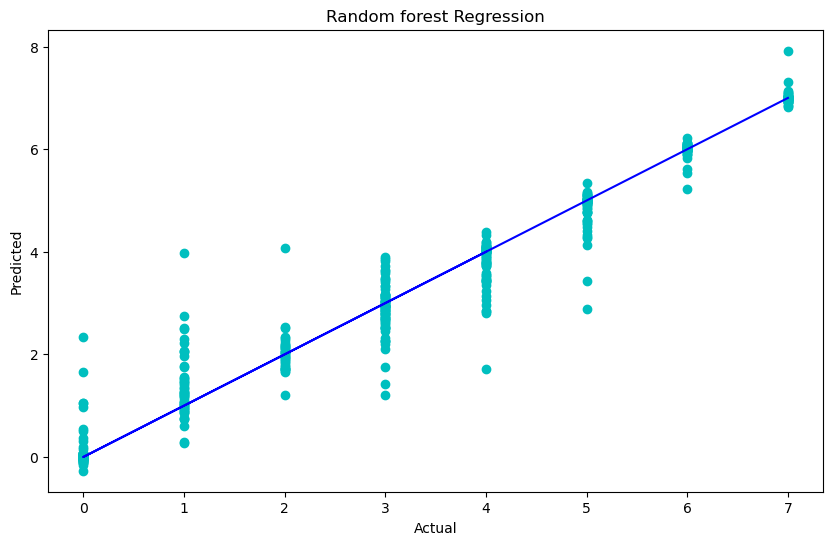

In [135]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y= mpred,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

## Hyperparameter tuning

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [137]:
final_model=RandomForestClassifier(max_features='log2',max_depth=20,min_samples_split= 2,n_estimators= 100)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 94.23076923076923


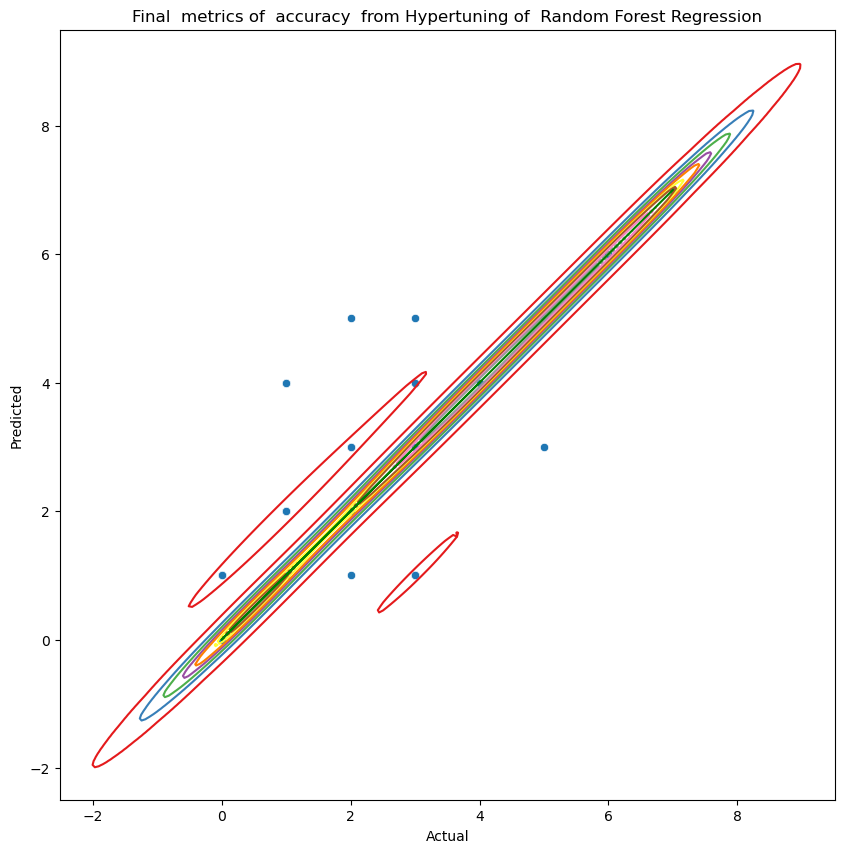

In [139]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=fmod_pred,palette='Set2')
sns.kdeplot(x=y_test,y=fmod_pred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

### Saving the model

In [140]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [141]:
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor()

In [142]:
final_model.fit(x_train,y_train)

RandomForestRegressor()

In [143]:
testing_data_prediction = final_model.predict(x_test)

In [145]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)
score*100

96.15196311829959

In [146]:
x1.head(2)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.641191,1.154079,-0.903897,0.386906,1.606549,-1.059632
1,0.185141,0.597383,-0.568118,0.673011,2.269761,0.400848


In [147]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2015.0,174,2


In [148]:
#BULDING THE PREDICTION SYSTEM
input_data = (28.1839,73.2407,6,2011,109,1)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print('Predicted capacity_mw : ',str(prediction))

Predicted capacity_mw :  [2.26]


### getting predicted capacity_mw is 2.26 against 2.5

### Predicting the saved model

In [149]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

#Prediction
prediction = model.predict(x_test)

In [150]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

,original,predicted
0,7,7.00
1,7,7.00
2,6,6.00
3,3,3.08
4,3,1.19
5,3,3.00
6,2,1.99
7,0,0.01
8,0,0.25
9,2,2.11


### the above results shows that 96.15% results were predicted accurately as per the model.

# Thank you